<h1 style="color:blue"> Bayesian Statistics and Probabilistic Programming</h1>

<h1 style="color:blue"> Spring 2024 - Homework 01</h1>

<h3 style="color:blue">2024-03-25</h3>

<h3 style="color:blue">Team members:</h3>

- Alejandro Astruc López (aastrulo56@alumnes.ub.edu)
- Joel Dieguez Vila (jdieguvi15@alumnes.ub.edu)
- Alba García Romo (agarciro335@alumnes.ub.edu)
- Clàudia Valverde Sánchez (clvalves7@alumnes.ub.edu)


<h1 style="color:blue">Instructions</h1>

### Submissions:

1. By **groups** of _about_ three students (meaning: two is OK, four is not advisable but possible. Individual homeworks will also be accepted but collaborative work is preferable).

2. Please send me an **email** with the team members names by March 31.

3. Only **one copy** of each group's work must be uploaded (by any member).

4. **Full names** and **email address** of all team members must appear in the header.

### Format:

A Jupyter or an Rmd **notebook** with a **header** clearly stating the names of all contributors.

### Documentation:

1. Comments **in code cells** (e.g., meaning of variables, parameters, purpose of functions) are necessary but not sufficient.

2. You are expected to give full explanations of steps taken in your solution (in **Markdown cells**), as well as discussion of results and their meaning.

3. Do not be afraid of being too verbose or too elementary, explain as if to someone learning.

### External sources

Getting _inspiration_ from any book, document, blog, web page, even mimicking solutions given in there, is **allowed and encouraged,** provided you give a **proper reference,** understand every such material, and explain it in you own words, even more exhaustively. Do not **copy/paste literally large chunks of code** I will detect it, believe me, even missing source reference. Bleak consequences.

### Deadline:

Completed assignments are due on **Monday, April 15**. They are to be uploaded to the Virtual Campus.

<h1 style="color:blue">Exercises</h1>

## Exercise 1: Placenta previa

This exercise pertains to what we studied in `Binomial.3.Placenta.previa.pub.ipynb`.

1. Compute the posterior pdf, and both prior and posterior predictor pmf for the placenta previa problem, using a conjugate $\textrm{Beta}(\alpha,\beta)$ prior, for several values of the parameters, obtaining for each of them a 95% (centered) credible interval and the MAP and posterior expectation estimators of $\theta$. In particular, reproduce Figure 2.3 and Table 2.1 in <a href="https://users.aalto.fi/~ave/BDA3.pdf">BDA3</a> [1]. Do the same for those $\alpha_0$ and $\beta_0$ such that $\textrm{Beta}(\alpha_0,\beta_0)$ has the same expectation and variance than the piecewise linear nonconjugate prior. Compare the posterior quantities with both priors.

2. Simulate the prior predictive pmf with the nonconjugate piecewise linear pdf. Do it in both possible ways: (1) Sample from $h$ by the inverse transformation method and (2) Sample from its discretization. Summarize the resulting simulated sample: plot the empirical pmf, compute median, mode, expectation, standard deviation. Compare the results with those obtained from the conjugate prior $\textrm{Beta}(\alpha_0,\beta_0)$.

3. Simulate the posterior predictive pmf (given the observed data of 437 female births from 980 placenta previa births) with the nonconjugate piecewise linear pdf. Sample from the the discretization of the posterior pdf as in Exercise 1. Summarize the resulting simulated sample: plot the empirical pmf, compute median, mode, expectation, standard deviation. Compare the results with those obtained from the conjugate prior $\textrm{Beta}(\alpha_0,\beta_0)$.

[1] _Bayesian Data Analysis - Third edition_ **(BDA3),** pag. 37.

## Answer 1.1

### Posterior pdf, prior and posterior predictor pmf:

Begining with Bayes' rule we can obtain the posterior density:


<center> $p(θ \mid y) = \displaystyle\frac{p(θ)p(y \mid θ)}{p(y)}$, </center>

where whe have:

- $p(θ \mid y)$, the posterior pdf (porbability density function).
- $p(y \mid θ)$, the likelihood.
- $p(y)$, prior preditive pmf.
- $p(θ)$, the prior.  

Given a hypothetical model for generating the observed data $y$, the model depends on a set of parameters represented by $θ$. Prior knowledge based on previous studies informs us about the statistical distribution $θ$ must be sampled from, i.e., the prior distribution $p(θ)$.   

For the placenta previa problem: we model the ocurrence of female birth as a binomial distribution, meaning that for a given $θ$ the probability of observing $y$ female births on a population of $n$ women with placenta previa is (likelihood): <center> $p(y \mid θ) =\displaystyle\binom ny θ^y(1-θ)^{n-y}$. </center>

Here $θ$ represents the probability of a single placenta previa pregnancy leading the the brith of a female baby.

Now we are asked to use a beta distibution as prior: <center> $ θ  \sim \operatorname{Beta}(\alpha, \beta) $, or equivalently $p(θ)= \displaystyle{θ^{\alpha-1}(1-θ)^{\beta-1} \over \textrm{B}(\alpha,\beta)} $, </center>
where $\textrm{B}$ is the beta function.

In this case we have  conjugate prior, meaning the posterior follows a beta dsitribution as well. If we take into account that the marginal probability (prior predictive):

* $p(y)=\displaystyle\int_0^1 p(y\mid θ)p(θ) dθ
 = \displaystyle\int_0^1 \binom ny θ^y(1-θ)^{n-y} \cdot {θ^{\alpha-1}(1-θ)^{\beta-1} \over \textrm{B}(\alpha,\beta)} dθ  = \\
 = \displaystyle\int_0^1 \binom ny {θ^{\alpha+y-1} (1-θ)^{\beta+n-y-1} \over \textrm{B}(\alpha,\beta)} dθ
 = \displaystyle \binom ny \frac{\textrm{B}(\alpha+y,\beta+n-y)}{\textrm{B}(\alpha,\beta)}$

 a beta binomial, then, we have all the neccesary elements to compute the posterior probability density function and obtain:

 <center> $θ \sim \textrm{Beta}(\alpha+y,\beta+n-y)$

 <center> $p(θ\mid y) = \displaystyle\frac{p(θ)p(y \mid θ)}{p(y)}
 = \frac{\frac{θ^{\alpha-1}(1-θ)^{\beta-1}}{\textrm{B}(\alpha,\beta)} \cdot \binom ny θ^y(1-θ)^{n-y}}{\binom ny \frac{\textrm{B}(\alpha+y,\beta+n-y)}{\textrm{B}(\alpha,\beta)}}
 = \displaystyle{θ^{\alpha+y-1}(1-θ)^{\beta+n-y-1} \over \textrm{B}(\alpha + y,\beta +n -y)} $ </center>

Implying that:
 * $\mathbb{E}[p(θ\mid y)]=\displaystyle\frac{\alpha+y}{\alpha + β + n}$
 * $mode$ $[p(θ\mid y)]= \displaystyle\frac{\alpha+y-1}{\alpha+\beta+n-2}$ for $\alpha+y,\beta-y+n>1$

This directly shows how, given a binomial model, the piror conjugate distribution is updated into the posterior after new evidence is incorporated.

Now, for calculating the probability of observing new data $\tilde{y}$ based on the prior and observed knowledge we look into the posterior predictive distribution. It is obtained by integrating the likelihood  of the new data over all $θ$'s weighted by the posterior probability of each $θ$: <center>$p(\tilde{y}\mid y)=\displaystyle\int p(\tilde{y} \mid \tilde θ)p(\tilde θ\mid y)d \tilde θ= {\tilde{n}\choose \tilde{y}}\frac{\mathrm{B}(\alpha + y +\tilde{y},\beta + n + \tilde{n}-y-\tilde{y})} {\mathrm{B}(\alpha+y,\beta+y-n)},$</center> which is a Beta-Binomial distribution.

Our newly observed data is that:  <center> $y = 437$ and $n = 980$. </center>

Meanwhile, we know that the porportion of female births on the general population is $0.485$, that is, we are given the expectation of the prior distribution:  <center> $\mathbb{E}[θ]=\displaystyle\frac{α}{α+β} =μ =0.458$. </center>





We are going to propose several values based on the selection of the parameters based on the book BDA3.

In the first cell, we are going to reproduce figure 2.3, with the graphics for the different values selected.

In the second cell, we reproduce the table 2.1 and add some fields. The table is composed by:
- The first columns represent alpha / (alpha + beta) and alpha + beta
- From these two values, we extract the alpha and beta
- Then we calculate the MAP
- The posterior expectation estimators of 𝜃 (PEE)
- And the median
- Then we propose two different confidence intervals, the first one centered around the MAP and the second one using quantiles
- We also wanted to show their length, to evaluate them

In [1]:
values <- list(c(0.500, 2), c(0.485, 2), c(0.485, 5), c(0.485, 10), c(0.485, 20), c(0.485, 100), c(0.485, 200))

Graphics for values: alpha = 1 , beta =  1 


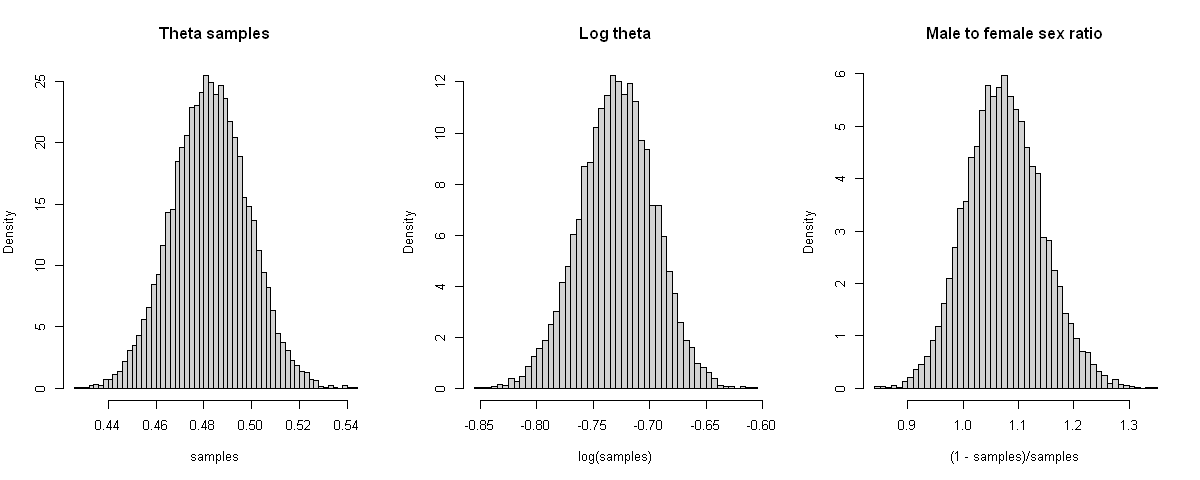

Graphics for values: alpha = 0.97 , beta =  1.03 


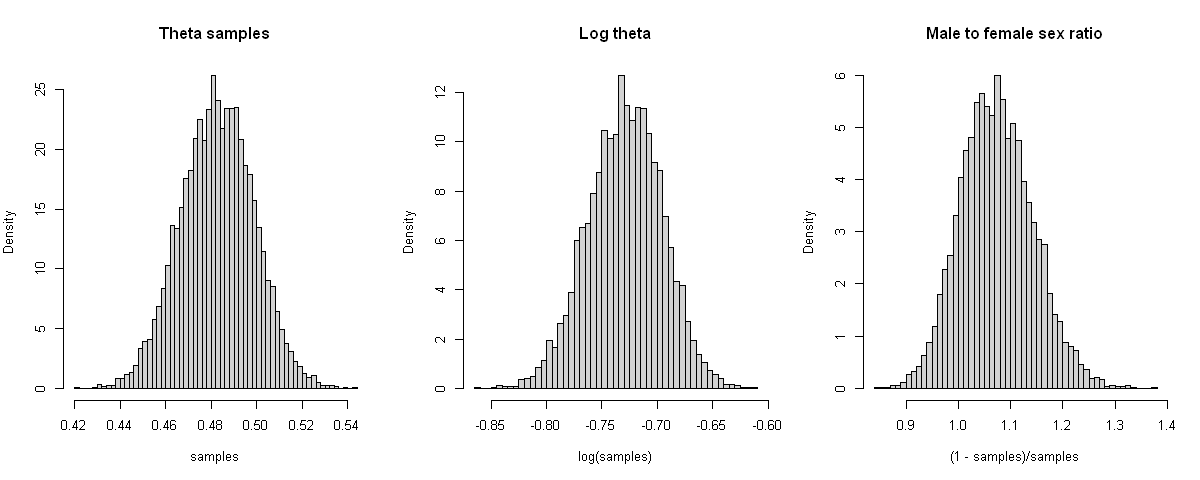

Graphics for values: alpha = 2.425 , beta =  2.575 


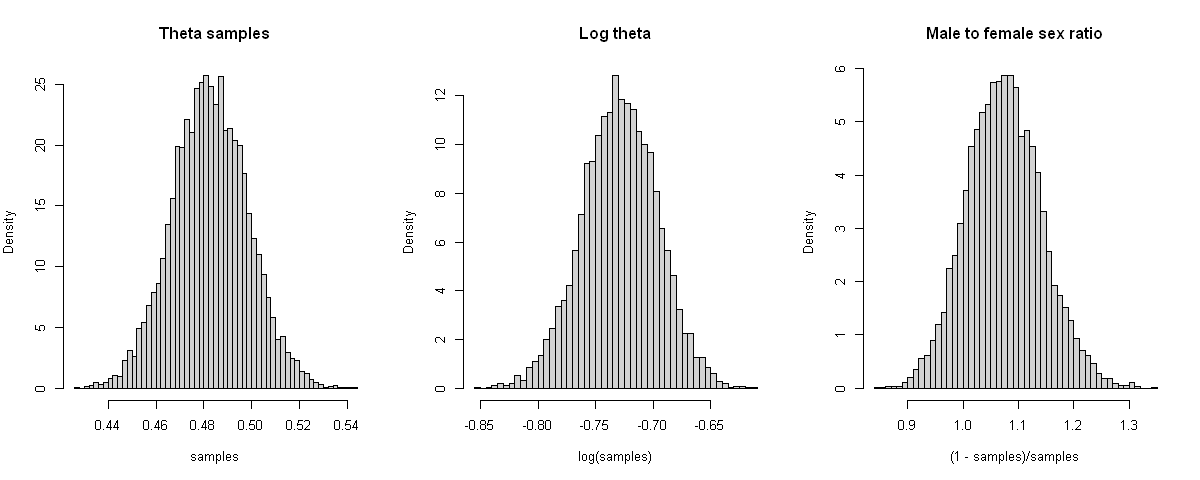

Graphics for values: alpha = 4.85 , beta =  5.15 


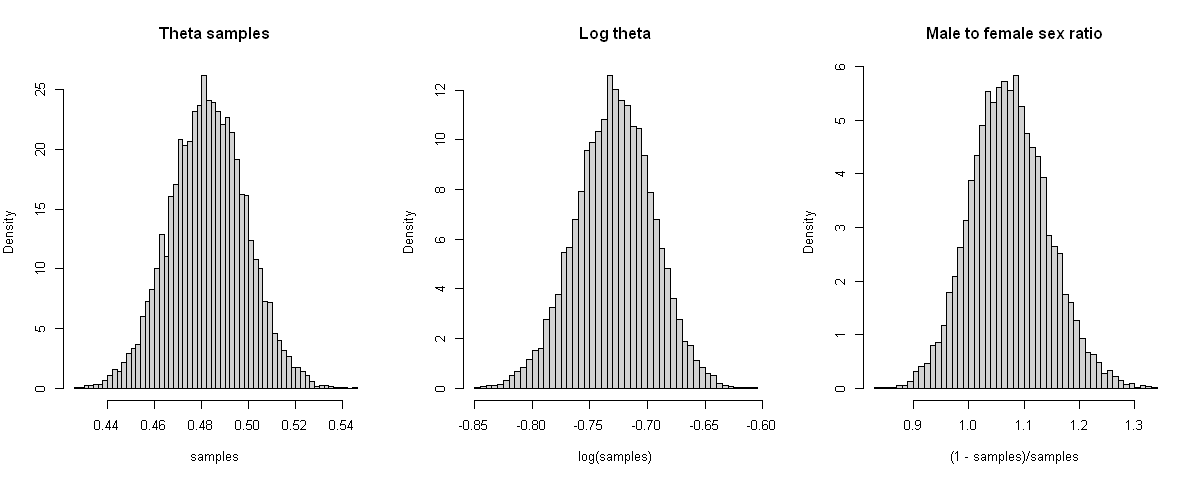

Graphics for values: alpha = 9.7 , beta =  10.3 


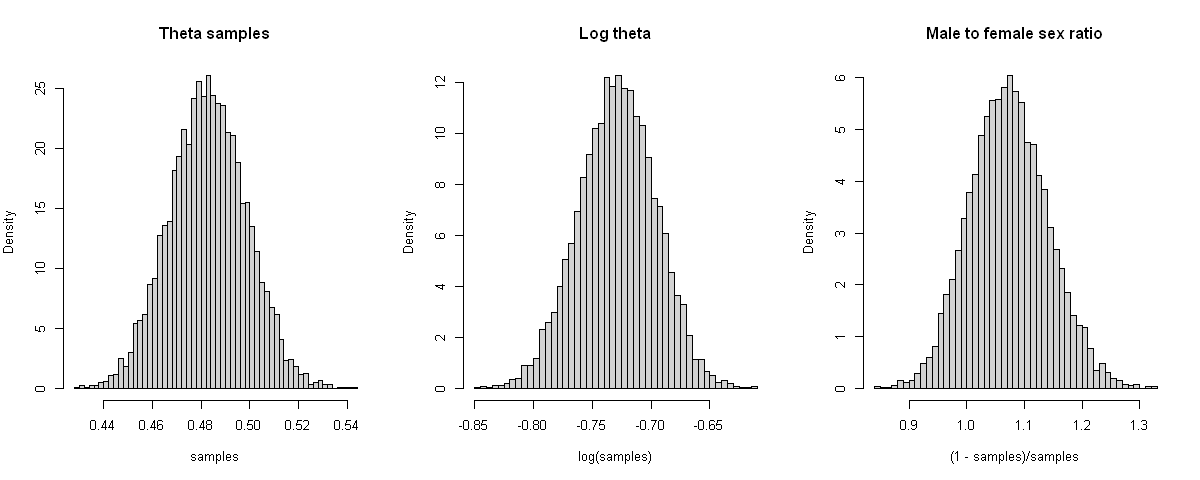

Graphics for values: alpha = 48.5 , beta =  51.5 


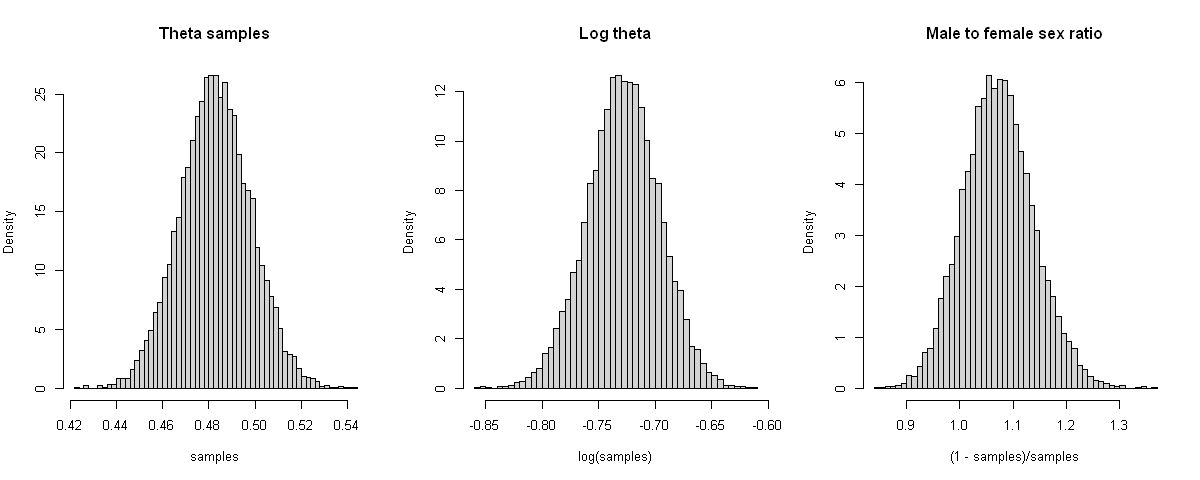

Graphics for values: alpha = 97 , beta =  103 


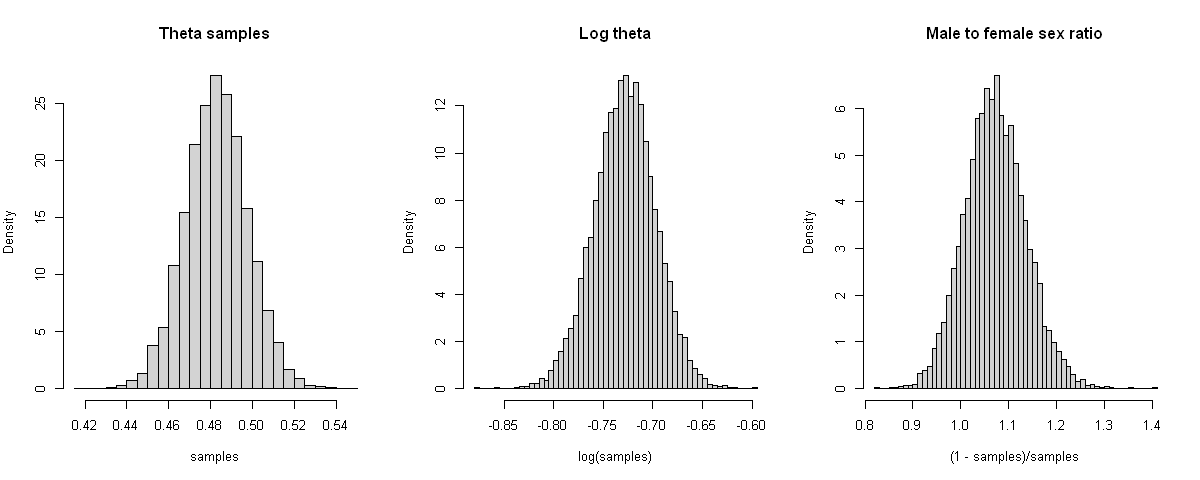

In [2]:
n = 980
y = 473
par(pin=c(4, 6))
for (val in values) {
    nu = val[1]
    sum = val[2]
    alpha = nu*sum
    beta = sum - alpha
    N = 10000
    samples = rbeta(N,alpha+y,beta+n-y)
    par(mfrow = c(1, 3), mar = c(5, 4, 4, 2))
    options(repr.plot.width=10, repr.plot.height=4)
    a=45
    hist(samples, breaks=a, freq=FALSE, main="Theta samples")
    hist(log(samples), breaks=a, freq=FALSE, main="Log theta")
    hist((1-samples)/samples, breaks=a, freq=FALSE, main="Male to female sex ratio")
    cat("Graphics for values: alpha =", alpha, ", beta = ", beta, "\n")
}

We are going to pick some values of alpha and beta based on the proportion of the women in all the population and the sum

In [3]:
n = 980
y = 437

cat('a/(a+b)\ta+b\talpha\tbeta\tMAP\t\tPEE\t\tmedian\t\tCentered conf. int.\t\tCCI length\tconfidence interval\t\tCI lenght\n')
for (val in values) {
    nu = val[1]
    sum = val[2]
    alpha = nu * sum
    beta = sum - alpha
    MAP = (alpha + y - 1) / (sum + n - 2)
    pee = (alpha + y) / (alpha + beta + n)

    confidence_level = 0.95
    lower_bound = qbeta((1 - confidence_level) / 2, alpha+y, beta+n-y)
    upper_bound = qbeta(1 - (1 - confidence_level) / 2, alpha+y, beta+n-y)

    N = 10000
    thetas.post = rbeta(N,alpha+y,beta+n-y)
    gamma<-0.95
    Sim.MAP = MAP
    Sim.gamma<-function(t){sum((Sim.MAP-t<=thetas.post)&(thetas.post<=Sim.MAP+t))/length(thetas.post)-gamma}
    G.t<-uniroot(Sim.gamma,c(0,10))
    Sim.t<-G.t$root
    centered_conf = c(max(0,Sim.MAP-Sim.t),min(1,Sim.MAP+Sim.t))

    median = qbeta(0.5, alpha+y, beta+n-y)

    cat(nu, "\t", sum, "\t", alpha, "\t", beta, "\t", MAP, "\t", pee, "\t", median, "\t", "[", centered_conf[1], ",", centered_conf[2], "]","\t",centered_conf[2]-centered_conf[1],"\t","[", lower_bound, ",", upper_bound, "]\t",upper_bound-lower_bound ," \n")
}

a/(a+b)	a+b	alpha	beta	MAP		PEE		median		Centered conf. int.		CCI length	confidence interval		CI lenght
0.5 	 2 	 1 	 1 	 0.4459184 	 0.4460285 	 0.4459919 	 [ 0.414504 , 0.4773328 ] 	 0.06282883 	 [ 0.4150655 , 0.4771998 ]	 0.06213428  
0.485 	 2 	 0.97 	 1.03 	 0.4458878 	 0.445998 	 0.4459613 	 [ 0.4145758 , 0.4771997 ] 	 0.06262383 	 [ 0.4150352 , 0.4771691 ]	 0.06213386  
0.485 	 5 	 2.425 	 2.575 	 0.4460071 	 0.4461168 	 0.4460803 	 [ 0.4151055 , 0.4769087 ] 	 0.06180326 	 [ 0.4151999 , 0.4772408 ]	 0.06204092  
0.485 	 10 	 4.85 	 5.15 	 0.4462045 	 0.4463131 	 0.446277 	 [ 0.414854 , 0.4775549 ] 	 0.06270095 	 [ 0.4154724 , 0.4773593 ]	 0.06188693  
0.485 	 20 	 9.7 	 10.3 	 0.4465932 	 0.4467 	 0.4466645 	 [ 0.4159112 , 0.4772752 ] 	 0.06136396 	 [ 0.4160098 , 0.4775921 ]	 0.06158232  
0.485 	 100 	 48.5 	 51.5 	 0.4494434 	 0.449537 	 0.4495059 	 [ 0.4195688 , 0.479318 ] 	 0.05974914 	 [ 0.4199775 , 0.4792736 ]	 0.05929606  
0.485 	 200 	 97 	 103 	 0.4524618 	 0.4525424 	 0

One could think the first approach for the confidence intervals is better as the intervals are more narrow, however we think the second one is better as it shows the asimetry of the function.

For the next part, we are going to find the values $\alpha_0$ and $\beta_0$ that share the same expectation and variance than the piecewise linear nonconjugate prior and compare them

The picewise linear funtion is defined as:

$$
    h(t)=\left\{
    \begin{array}{lcl}
         a,        &\text{ for }  &0<t<m-c \quad\text{and } m+c<t<1,\\
         A+b\cdot t/c,  &\text{ for }  &t\in [m-c,c],\\
         B-b\cdot t/c   &\text{ for }  &t\in [c,m+c],\\
    \end{array}
    \right.\mskip80mu t \in[0,1]
$$

where $a=0.50$, $b=5.00$ is the height of the central triangle ($a+b$ is the peak ordinate), $A=a+b-(b\cdot m)/c$,
$B<-a+b+(b\cdot m)/c$.

In [4]:
# Definition of the piecewise linear nonconjugate prior

m<-0.485
c<-0.100
p.tails<-0.4
a<-0.5
b<-5.0
A<-a+b-(b*m)/c
B<-a+b+(b*m)/c
h<-function(t){return(a*(t>=0)*(t<m-c)+a*(t>m+c)*(t<=1)+(A+b*t/c)*(t>m-c)*(t<m)+(B-b*t/c)*(t>m)*(t<m+c))}

And has the following momentums:

* $\mathbb{E}[t]
=\displaystyle\int h(t)\cdot t \,dt
=\int_0^{m-c} at\,dt+\int_{m-c}^{m}(A+b\cdot \frac{t}{c})t\,dt+\int_{m}^{m+c} (B-b\cdot \frac{t}{c})t\,dt+\int_{m+c}^{1} at\,dt = \\
= \frac{1}{6c} \left( 3ac \cdot (m-c)^2 + 3cA \cdot (m^2-(m-c)^2) + 2b \cdot (m^3-(m-c)^3) + 3cB \cdot ((m+c)^2-m^2) - 2b \cdot ((m+c)^3 - m^3) + 3ac \cdot (1 - (m+c)^2) \right)
= 0.4925$

* $\mathbb{V}[t]
=\mathbb{E}[(t-\mathbb{E}[t])^2]
= \mathbb{E}[t^2]-\mathbb{E}[t]^2
= \displaystyle\int h(t^2)\cdot t\,dt -\mathbb{E}[t]^2
=\int_0^{m-c} at\,dt+\int_{m-c}^{m}(A+b\cdot \frac{t^2}{c})t\,dt+\int_{m}^{m+c} (B-b\cdot \frac{t^2}{c})t\,dt+\int_{m+c}^{1} at\,dt = \\
= \frac{a}{3} \left(1 + (m - c)^3 - (m + c)^3\right) + \frac{A}{3} \left(m^3 - (m - c)^3\right) + \frac{b}{4c} \left(m^4 - (m - c)^4\right) + \frac{B}{3} \left((m + c)^3 - m^3\right) - \frac{b}{4c} \left((m + c)^4 - m^4\right) - \mathbb{E}^2
= 0.04255625
$

In [5]:
# Expectation
expectation = 1/(6*c) * ( a*3*c*(m-c)^2 + A*3*c*(m^2-(m-c)^2) + 2*b*(m^3-(m-c)^3) + 3*c*B*((m+c)^2-m^2) - 2*b*((m+c)^3 - m^3) + a*3*c*(1 - (m+c)^2) )
cat("expectation =", expectation, "\n")

expectation = 0.4925 


In [6]:
# Another way to calculate expectation
h2 = function(t){h(t)*t}
integrate(h2, lower=0, upper=1)

0.4924999 with absolute error < 1e-04

In [7]:
# Variance
var = a/3*(1+(m-c)^3-(m+c)^3) + A/3*(m^3-(m-c)^3) + b/4/c*(m^4-(m-c)^4) + B/3*((m+c)^3 - m^3) - b/4/c*((m+c)^4-m^4) - expectation^2
cat("var =", var, "\n")

var = 0.04255625 


In [8]:
# Another way to calculate var
h3 = function(t){((t - expectation)^2)*h(t)}
integrate(h3, lower=0, upper=1)

0.04255771 with absolute error < 1.8e-05

To get the proper alpha and beta values, we can use the following properties of the beta function:

Expectation: $\quad \mu = \frac{\alpha}{\alpha + \beta} $

Variance: $\quad \sigma^2 = \frac{\alpha \cdot \beta}{(\alpha + \beta)^2 \cdot (\alpha + \beta + 1)}$

Then: $x=α+β$; $\quad α=\mu x$ ; $\quad β=(1-\mu)x$
$\Rightarrow \quad \sigma^2 = \frac{\mu(1-\mu) x^2}{x^2 \cdot (x + 1)}=\frac{\mu(1-\mu)}{x+1} \quad \Rightarrow \quad x = \frac{\mu - \mu^2 - \sigma^2}{\sigma^2}$


In [9]:
sum = (expectation - expectation^2 - var) / var

cat("sum = ", sum, "\n")

alpha0 = expectation * sum
beta0 = sum - alpha0

cat("a_0 =", alpha0, "\n")
cat("b_0 =", beta0, "\n")

sum =  4.873256 
a_0 = 2.400079 
b_0 = 2.473177 


Graphics for values: alpha_0 = 2.400079 , beta_0 =  2.473177 


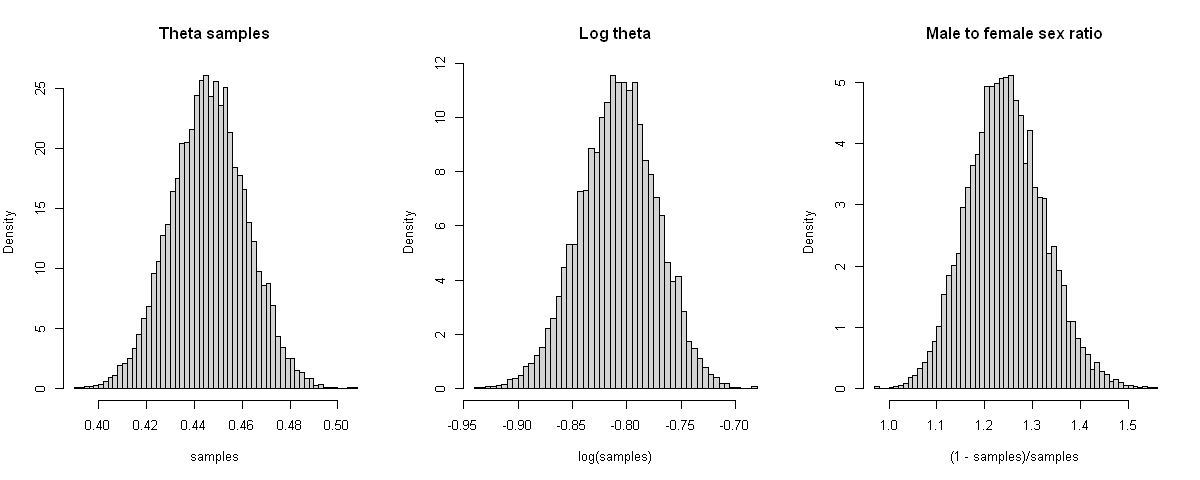

In [10]:
N = 10000
n = 980
y = 437
samples = rbeta(N,alpha0+y,beta0+n-y)
par(mfrow = c(1, 3), mar = c(5, 4, 4, 2))
options(repr.plot.width=10, repr.plot.height=4)
hist(samples, breaks=45, freq=FALSE, main="Theta samples")
hist(log(samples), breaks=45, freq=FALSE, main="Log theta")
hist((1-samples)/samples, breaks=45, freq=FALSE, main="Male to female sex ratio")
cat("Graphics for values: alpha_0 =", alpha0, ", beta_0 = ", beta0, "\n")

In [11]:
n = 980
y = 437

cat('alpha0\t\tbeta0\t\tMAP\t\tPEE\t\tmedian\t\tCentered conf. int.\t\tCCI length\tconfidence interval\t\tCI lenght\n')

MAP = (alpha0 + y - 1) / (sum + n - 2)
pee = (alpha0 + y) / (alpha0 + beta0 + n)

confidence_level = 0.95
lower_bound = qbeta((1 - confidence_level) / 2, alpha0+y, beta0+n-y)
upper_bound = qbeta(1 - (1 - confidence_level) / 2, alpha0+y, beta0+n-y)

N = 10000
thetas.post = rbeta(N,alpha0+y,beta0+n-y)
gamma<-0.95
Sim.MAP = MAP
Sim.gamma<-function(t){sum((Sim.MAP-t<=thetas.post)&(thetas.post<=Sim.MAP+t))/length(thetas.post)-gamma}
G.t<-uniroot(Sim.gamma,c(0,10))
Sim.t<-G.t$root
centered_conf = c(max(0,Sim.MAP-Sim.t),min(1,Sim.MAP+Sim.t))

median = qbeta(0.5, alpha0+y, beta0+n-y)

cat(alpha0, "\t", beta0, "\t", MAP, "\t", pee, "\t", median, "\t", "[", centered_conf[1], ",", centered_conf[2], "]","\t",centered_conf[2]-centered_conf[1],"\t","[", lower_bound, ",", upper_bound, "]\t",upper_bound-lower_bound ," \n")

alpha0		beta0		MAP		PEE		median		Centered conf. int.		CCI length	confidence interval		CI lenght
2.400079 	 2.473177 	 0.4460393 	 0.4461489 	 0.4461124 	 [ 0.4147548 , 0.4773238 ] 	 0.06256899 	 [ 0.4152298 , 0.4772751 ]	 0.06204534  


Now, let's compare the posterior quantities with both priors. The calculation of the function in explained in detail in 1.3.

In [12]:
# Let's compare the posterior quantities with both priors.
N = 1000
n = 980
y = 437
t<-seq(0,1,length=N)
t<-t[-N]

# piecewise linear nonconjugate prior has the following posterior:
# We will use the logarithmic approach
# Discretize, add the results and normalize it
LogLik<-function(y,theta,n){y*log(theta)+(n-y)*log(1-theta)}
log.nnpost<-LogLik(y,t,n)+log(h(t))
nnpost<-exp(log.nnpost)
dpost<-nnpost/sum(nnpost)

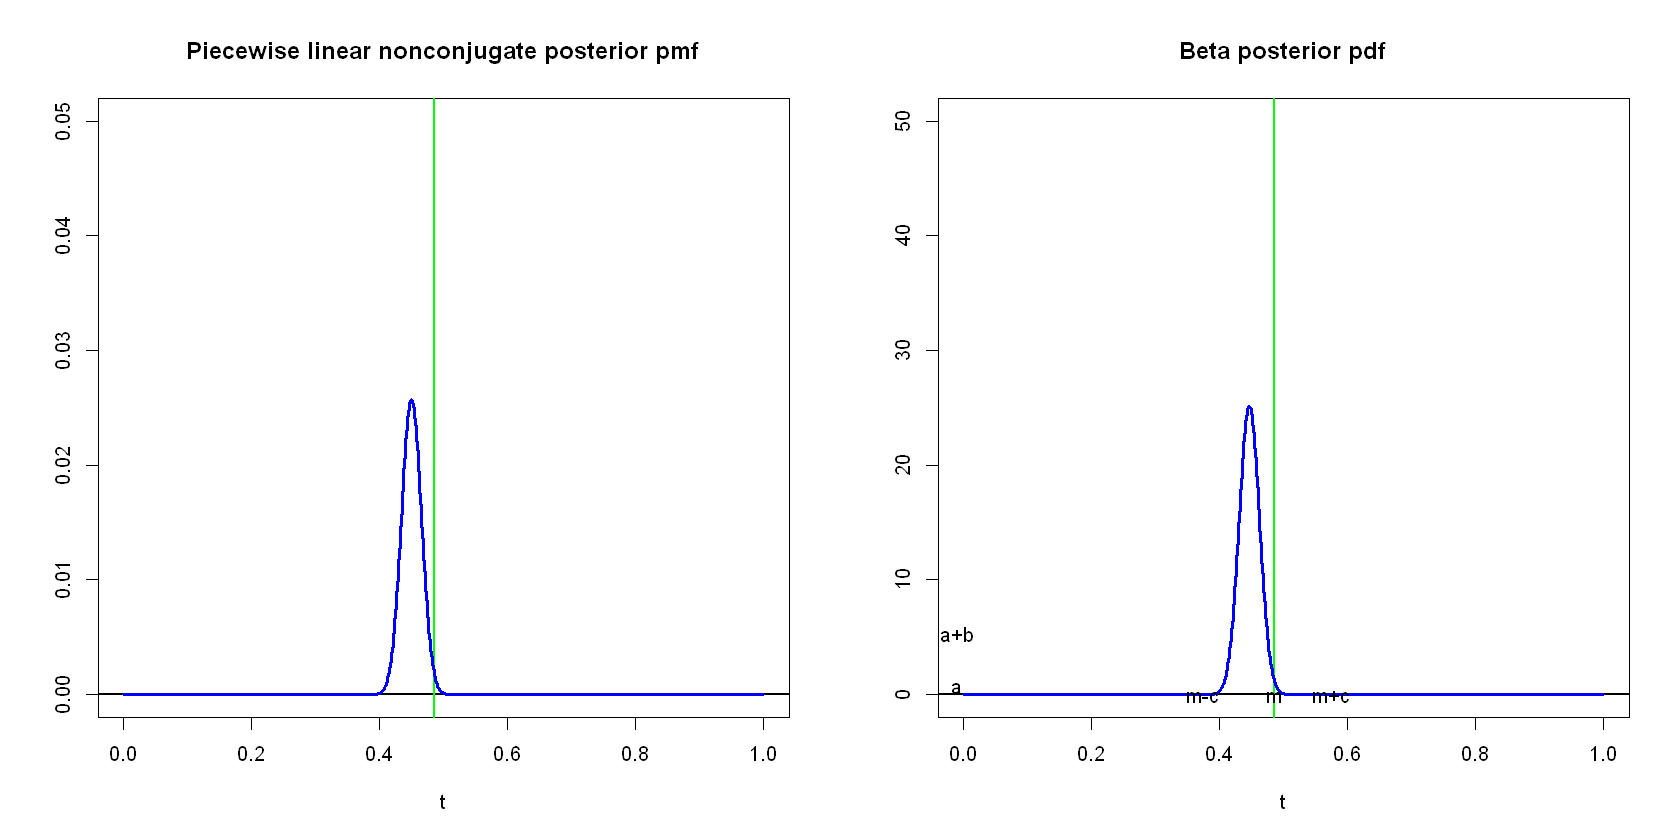

In [13]:
## Let's visualize it
options(repr.plot.width=14,repr.plot.height=7)
old.par<-par(mfrow=c(1,2))
# Piecewise nonconjugate posterior
plot(t,dpost,"l",lwd=2.5,col="blue",xlim=c(0,1),ylim=c(0,0.05),ylab="",main="Piecewise linear nonconjugate posterior pmf")
abline(h=0,lwd=2,col="black")
abline(v=m,lwd=2,col="green")
abline(h=a+b,lwd=2,col="green")
lines(t,dpost,lwd=2.5,col="blue")
text(-0.01,a+b-0.15,"a+b")
text(-0.01,a+0.15,"a")
text(m,-0.15,"m")
text(m-c-0.01,-0.15,"m-c")
text(m+c-0.01,-0.15,"m+c")
# Beta posterior
samples = dbeta(t,alpha0+y,beta0+n-y)
plot(t,samples,"l",lwd=2.5,col="blue",xlim=c(0,1),ylim=c(0,50),ylab="",main="Beta posterior pdf")
abline(h=0,lwd=2,col="black")
abline(v=m,lwd=2,col="green")
lines(t,samples,lwd=2.5,col="blue")
text(-0.01,a+b-0.15,"a+b")
text(-0.01,a+0.15,"a")
text(m,-0.15,"m")
text(m-c-0.01,-0.15,"m-c")
text(m+c-0.01,-0.15,"m+c")

Both posteriors look very similar. The main difference comes from the scale of the values, while the pmf is a probability and all values are between 0 and 1 and they add to 1, the pdf is not and has much bigger values.

## Answer 1.2

#### 1.2.1 Sampling the prior with the inverse cdf method:

In [14]:
#Inverse function
inverse <- function(f, lower = 0., upper = 1.) {
   return(function(y){
     root <-uniroot(function(x){f(x) - y}, lower = lower, upper = upper)$root
     return(root)
   })
}

#Definition of the cdf for h
H = function(x){
  return(integrate(h, lower = 0, upper = x)$value)
}

#Applying the inverse cdf for N unif. distributed samples between 0 and 1
#we map values from 0 to 1 to values distributed as the picewise linear prior
rh_inv.cdf = function(N){
    F_inv = inverse(H)
    output = c()
    X = runif(N, min = 0, max = 1)
    for (x in X){
        output = append(output, F_inv(x))
    }
    return(output)
}
N = 10000
pl.sim.thetas = rh_inv.cdf(N)

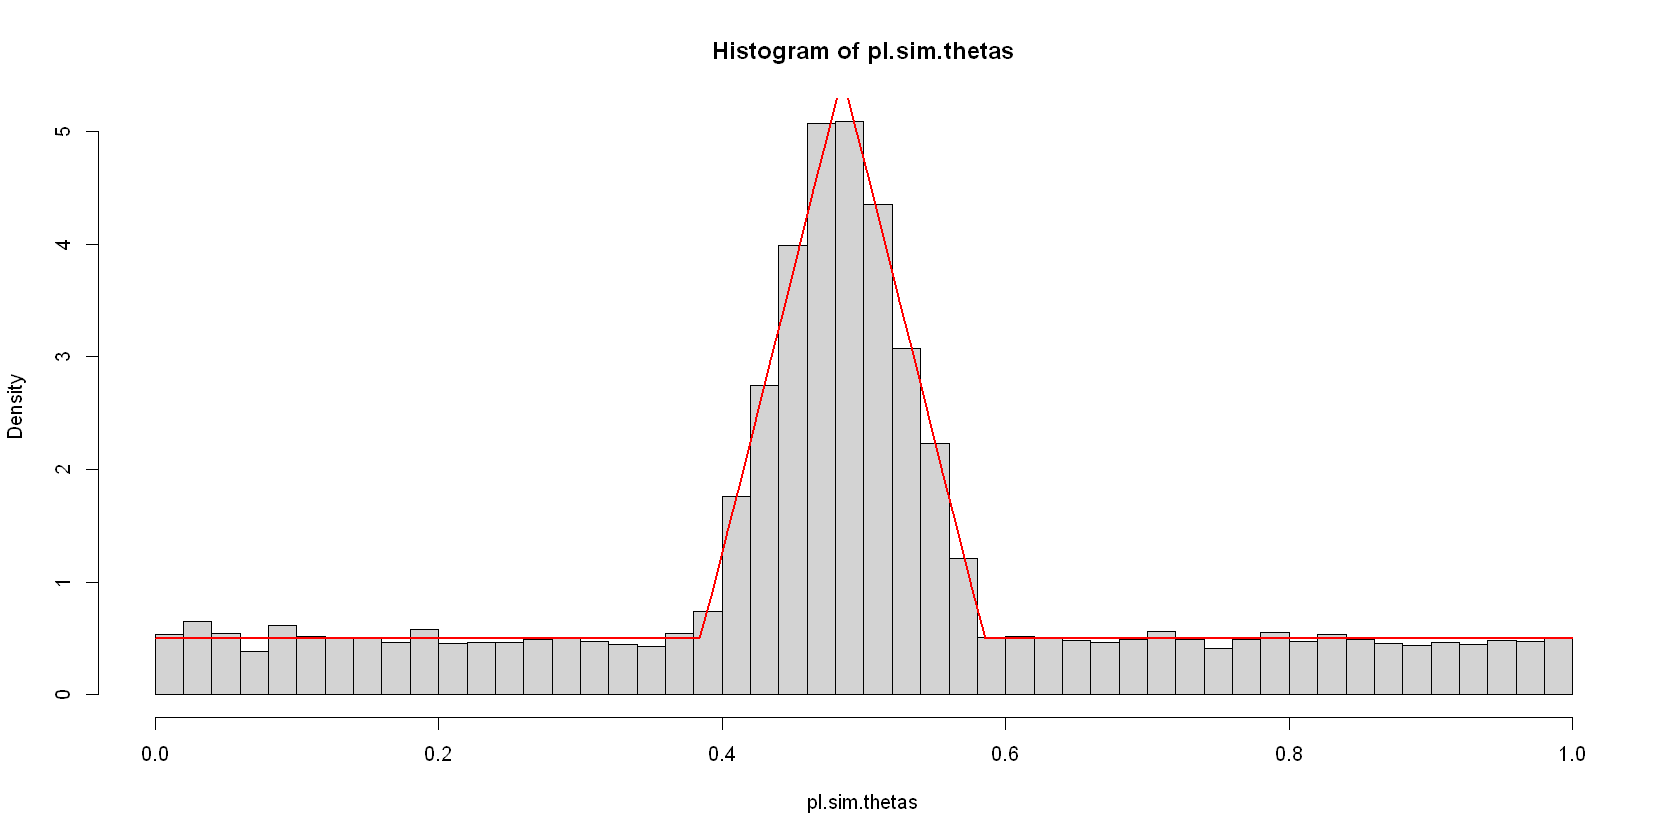

In [15]:
hist(pl.sim.thetas, breaks=60, freq=FALSE)
x <- seq(0, 1, length.out = 100)
lines(x, h(x),col = "red", lwd = 2)

[1] "Median: 475"
[1] "Mode: 477"
[1] "Expectation (Mean): 478.5617"
[1] "Standard Deviation: 202.338894174896"


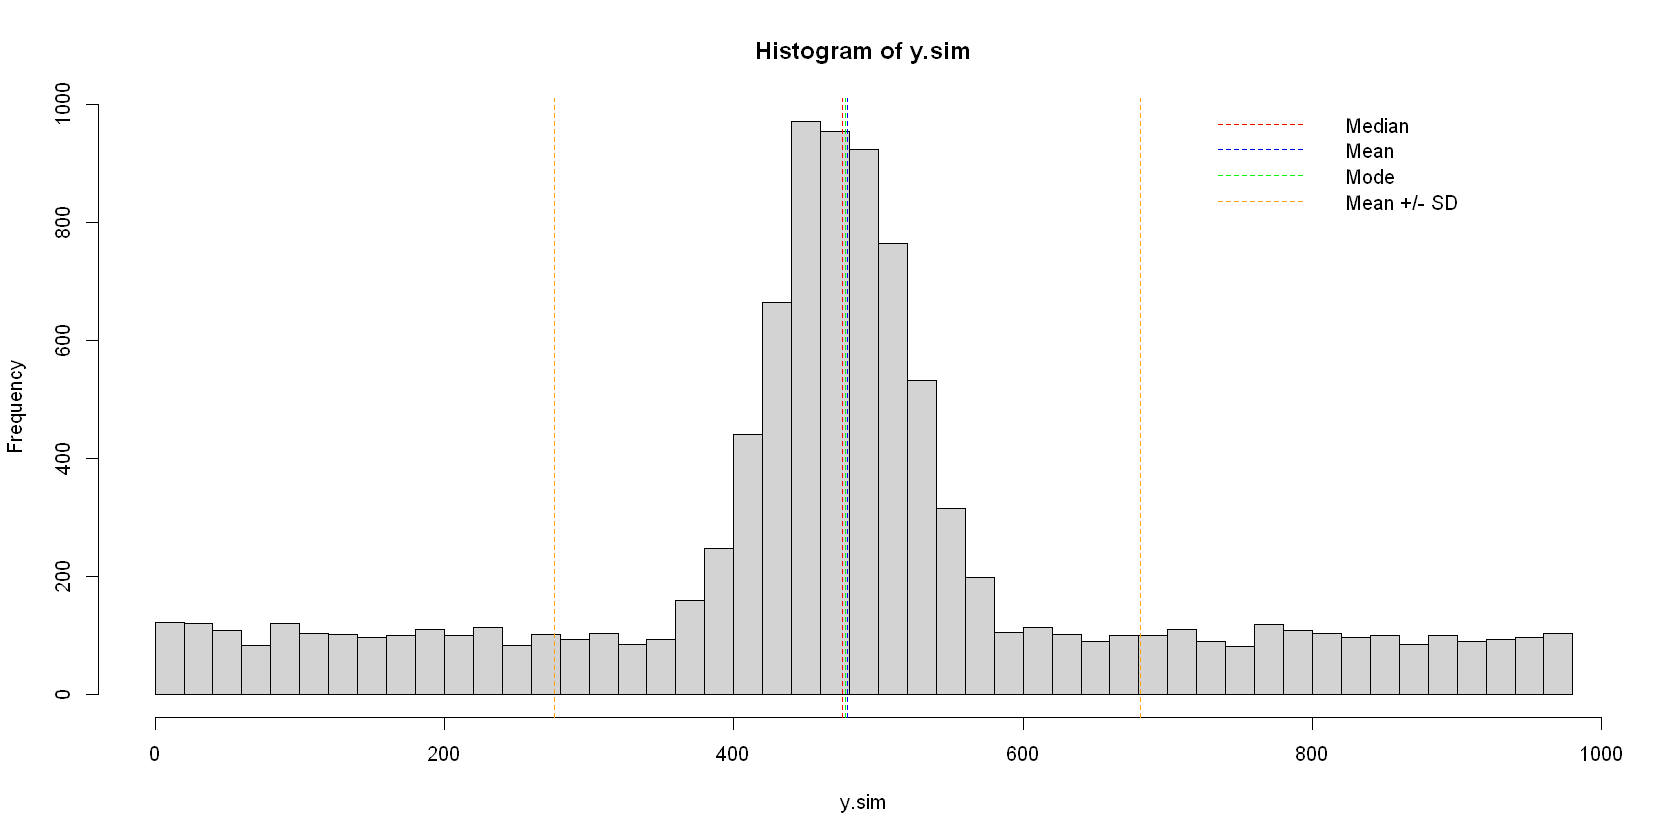

In [16]:
#Sampling from the prior predictive
y.sim = rbinom(N, size = n, prob=pl.sim.thetas)
hist(y.sim, breaks=40)

# Plot histogram of original data
#hist(y.sim, breaks = 5, col = "lightblue", main = "Histogram", xlab = "Value", ylab = "Density",freq=FALSE)

# Calculate statistics
mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}
median_value <- median(y.sim)
mean_value <- mean(y.sim)
mode_value <- mode(y.sim)
sd_value <- sd(y.sim)

# Plot vertical lines for statistics
abline(v = median_value, col = "red", lty = 2)
abline(v = mean_value, col = "blue", lty = 2)
abline(v = mode_value, col = "green", lty = 2)
abline(v = mean_value - sd_value, col = "orange", lty = 2)
abline(v = mean_value + sd_value, col = "orange", lty = 2)

# Add legend
legend("topright", legend = c("Median", "Mean", "Mode", "Mean +/- SD"), col = c("red", "blue", "green", "orange"), lty = 2, bty = "n")

# Print results
print(paste("Median:", median_value))
print(paste("Mode:", mode_value))
print(paste("Expectation (Mean):", mean_value))
print(paste("Standard Deviation:", sd_value))

#### 1.2.2 :  Sampling from the discretization of the prior:

In [17]:
N<-10000 # number of grid intervals
t<-seq(0,1,length=N)
t<-t[-N]# remove last point (equal to 1: we want N intervals)

# Sample from the discrete custom distribution
pl.sim.thetas <- sample(t, size = N, replace = TRUE, prob = h(t))

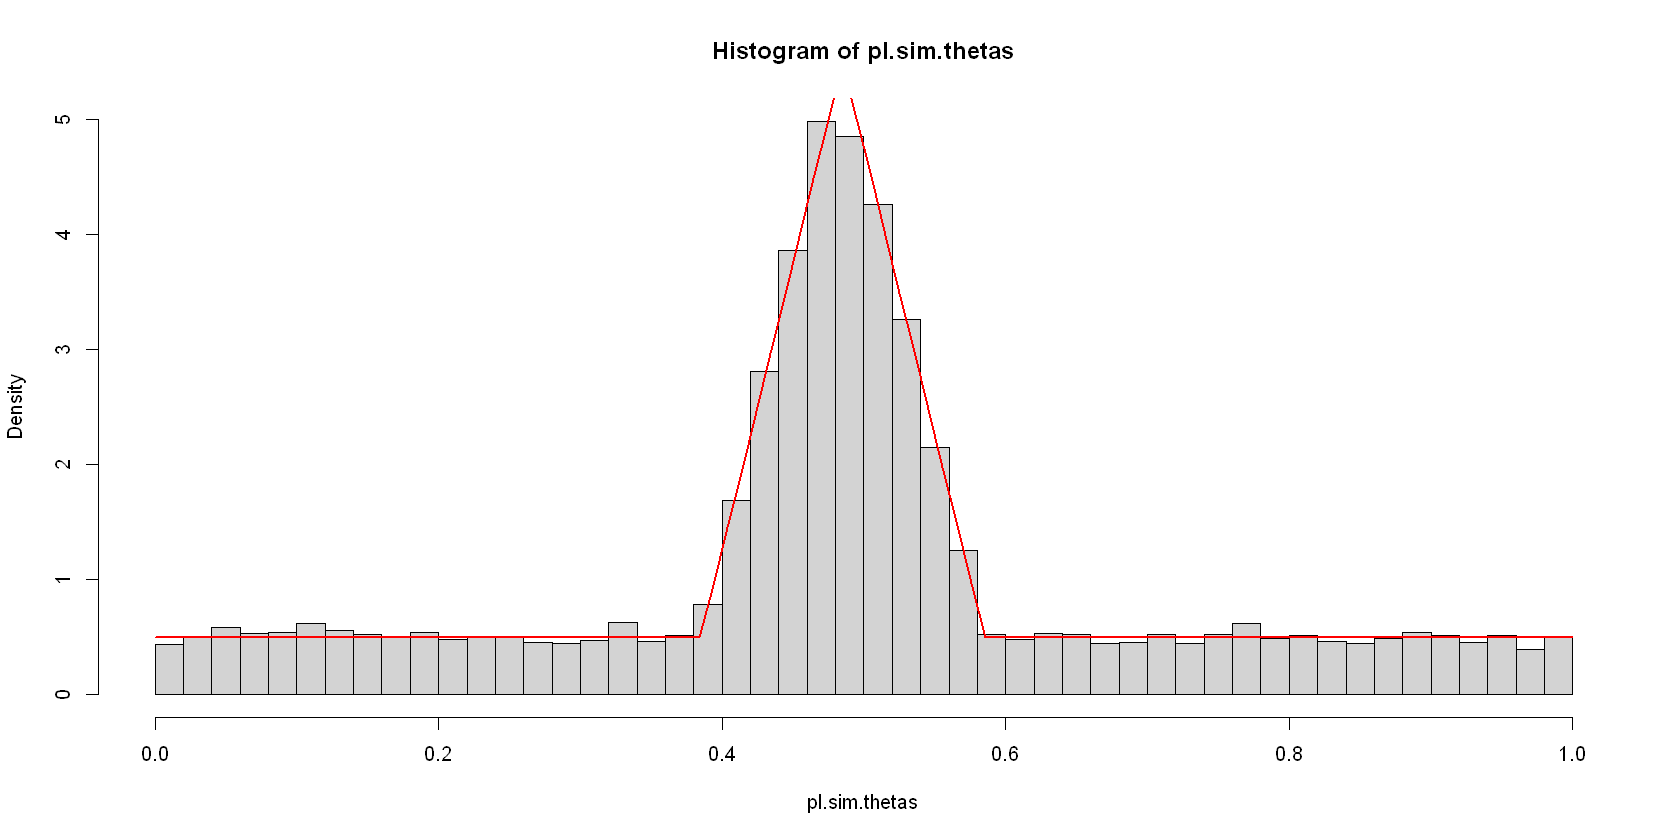

In [18]:
hist(pl.sim.thetas, breaks=60, freq=FALSE)
x <- seq(0, 1, length.out = 100)
lines(x, h(x),col = "red", lwd = 2)

[1] "Median: 475"
[1] "Mode: 488"
[1] "Expectation (Mean): 479.071"
[1] "Standard Deviation: 202.88527448403"


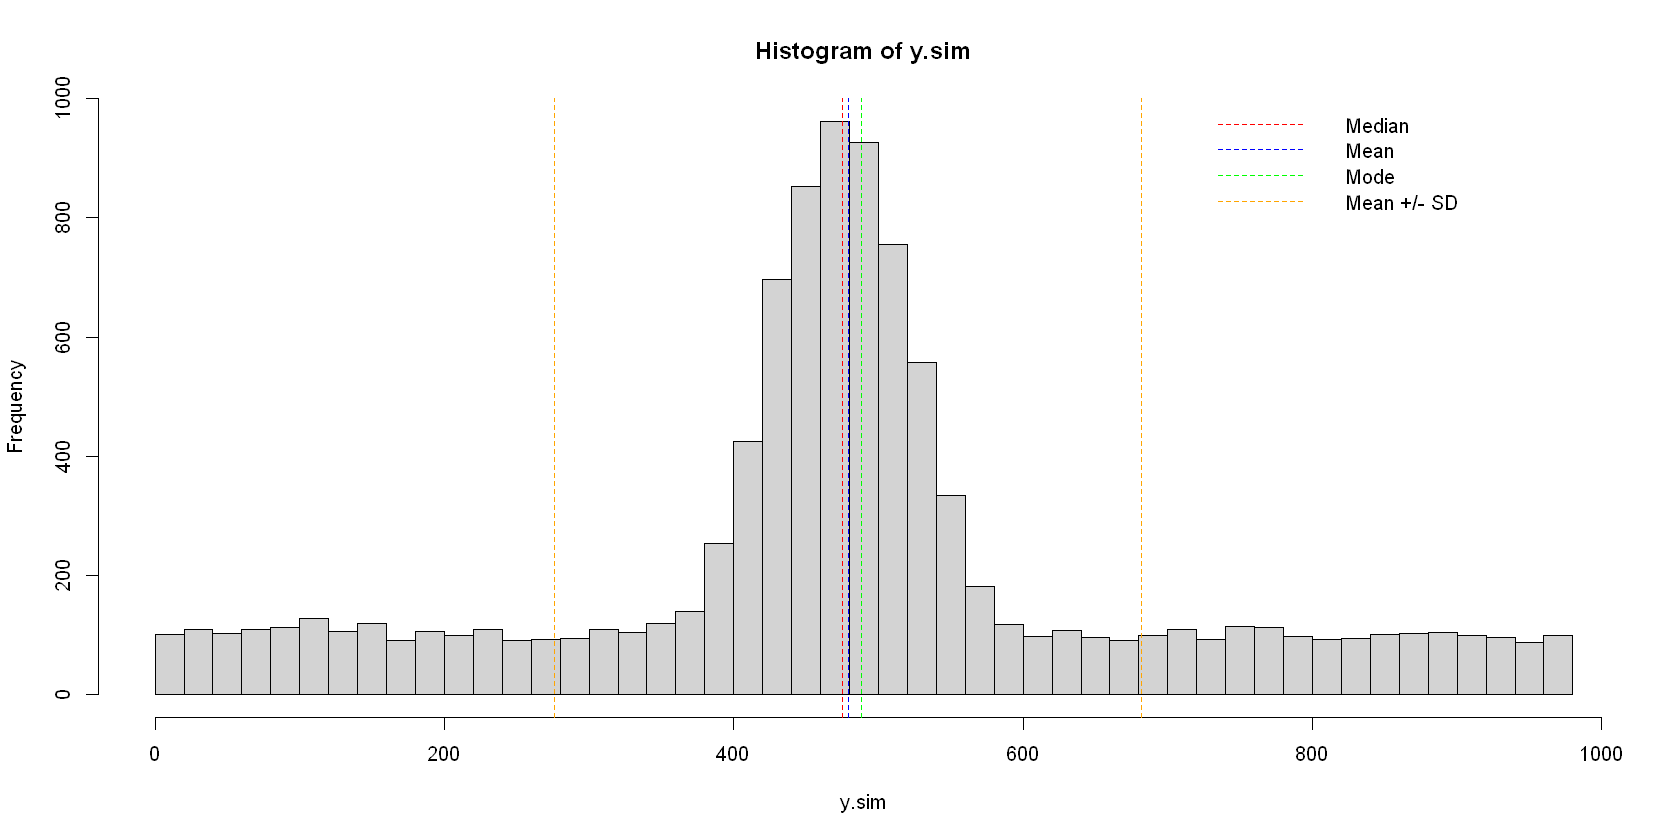

In [19]:
y.sim = rbinom(N, size = n, prob=pl.sim.thetas)
hist(y.sim, breaks=40)

median_value <- median(y.sim)
mean_value <- mean(y.sim)
mode_value <- mode(y.sim)
sd_value <- sd(y.sim)

# Plot vertical lines for statistics
abline(v = median_value, col = "red", lty = 2)
abline(v = mean_value, col = "blue", lty = 2)
abline(v = mode_value, col = "green", lty = 2)
abline(v = mean_value - sd_value, col = "orange", lty = 2)
abline(v = mean_value + sd_value, col = "orange", lty = 2)

# Add legend
legend("topright", legend = c("Median", "Mean", "Mode", "Mean +/- SD"), col = c("red", "blue", "green", "orange"), lty = 2, bty = "n")

# Print results
print(paste("Median:", median_value))
print(paste("Mode:", mode_value))
print(paste("Expectation (Mean):", mean_value))
print(paste("Standard Deviation:", sd_value))

### 1.2.3 Comparison with the resulst from the $\textrm{Beta}(\alpha_0,\beta_0)$ prior:

In [20]:
 #Defining the beta binomial distribution prior distribution
 dbb = function(x,N,u,v){
  return(choose(N,x)*beta(x+u,N-x+v)/beta(u,v))
 }

In [21]:
x_values <- 0:n
pmf <- dbb(x_values, n, alpha0, beta0)

[1] "Median: 482"
[1] "Mode: 478"
[1] "Expectation (Mean): 482.650000000011"
[1] "Standard Deviation: 202.667861907113"


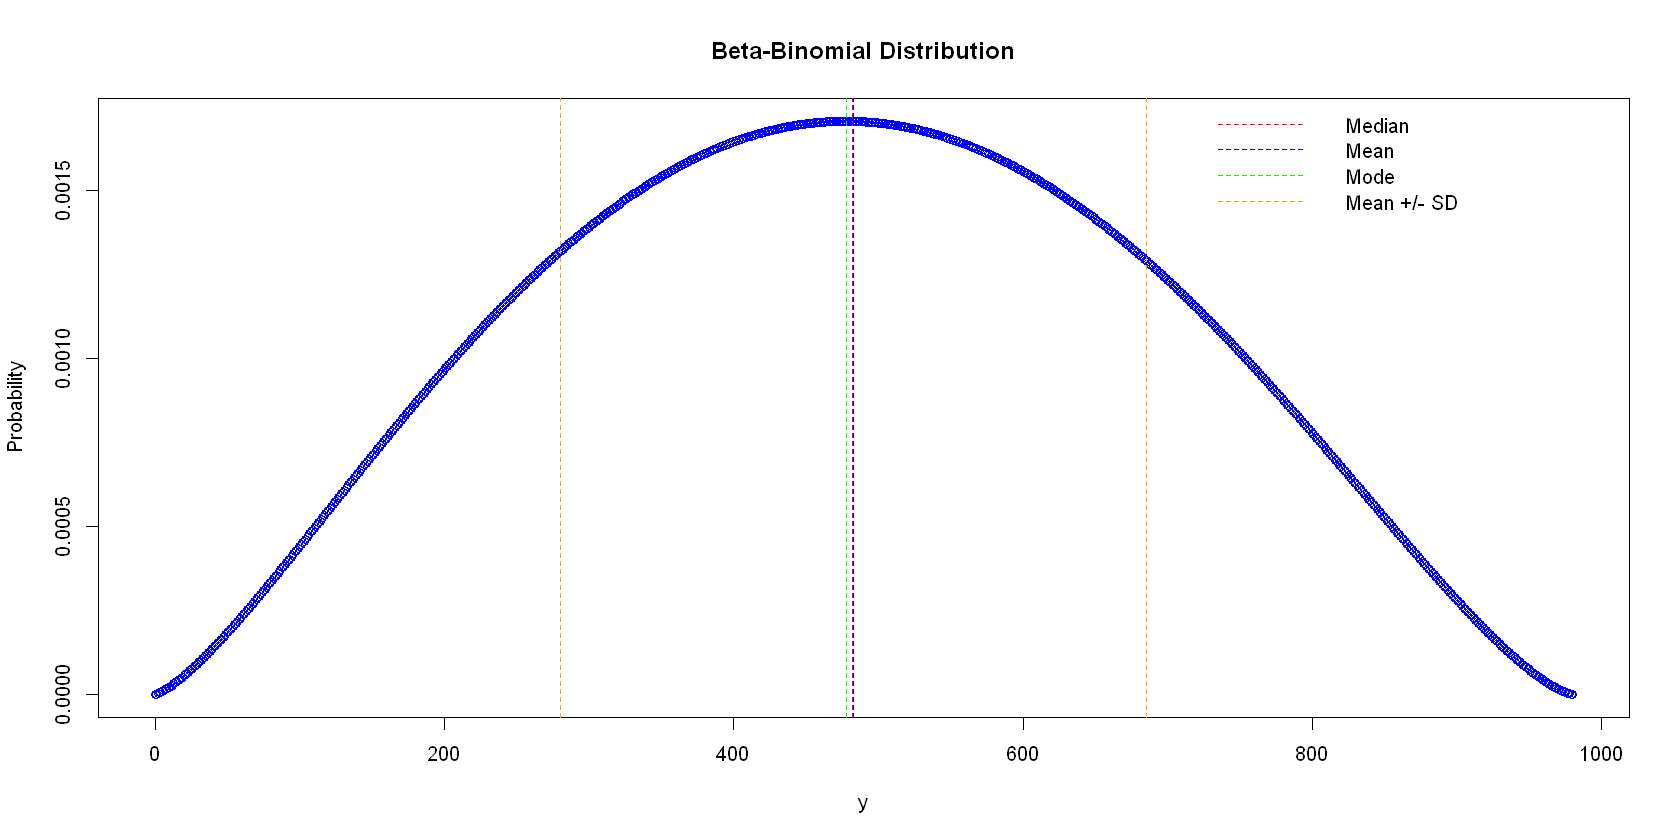

In [22]:
plot(x_values, pmf, col = "blue",
     main = "Beta-Binomial Distribution", xlab = "y", ylab = "Probability")

# Calculate statistics
mean_value <- sum(x_values * pmf)
cumulative_probabilities <- cumsum(pmf)
median_value <- findInterval(.5, cumulative_probabilities)
mode_value <- x_values[which.max(pmf)]
sd_value <- sqrt(sum(pmf * (x_values - mean_value)^2))

# Plot vertical lines for statistics
abline(v = median_value, col = "red", lty = 2)
abline(v = mean_value, col = "blue", lty = 2)
abline(v = mode_value, col = "green", lty = 2)
abline(v = mean_value - sd_value, col = "orange", lty = 2)
abline(v = mean_value + sd_value, col = "orange", lty = 2)

# Add legend
legend("topright", legend = c("Median", "Mean", "Mode", "Mean +/- SD"), col = c("red", "blue", "green", "orange"), lty = 2, bty = "n")

# Print results
print(paste("Median:", median_value))
print(paste("Mode:", mode_value))
print(paste("Expectation (Mean):", mean_value))
print(paste("Standard Deviation:", sd_value))

Comparing this distribution with the previously obtained for the picewise linear prior, the different statistics are similar. Now the posterior predictive is smoother and has a more evenly distributed area, leaving the extreme cases, i.e., tails, with much lower probabilities than the picewise linear.

## Answer 1.3

To compute the posterior predictive, we will follow the steps found in the notebook `Binomial.3.Placenta.previa.pub.ipynb`. Next, we explain all the steps that we will follow to find the posterior predictive function.

1. Our non-conjugate **prior function** is the following:
$$
    h(t)=\left\{
    \begin{array}{lcl}
         a,        &\text{ for }  &0<t<m-c \quad\text{and } m+c<t<1,\\
         A+b\cdot t/c,  &\text{ for }  &t\in [m-c,c],\\
         B-b\cdot t/c   &\text{ for }  &t\in [c,m+c],\\
    \end{array}
    \right.\mskip80mu t \in[0,1]
$$

where $a=0.50$, $b=5.00$ is the height of the central triangle ($a+b$ is the peak ordinate), $A=a+b-(b\cdot m)/c$,
$B<-a+b+(b\cdot m)/c$. We know that this distribution is centered at $m=0.485$ (i.e., $\theta_1$, the percentatge of female births in the population) and 40% of the probability mass is outside the interval [m-c,m+c]=[0.385,0.585], c=0.100.

To be able to sample from this distribution $h(t)$, we will construct a discretization of $h(t)$. We construct a grid of $N$ points $\mathbf{t}=(t_1,\dots,t_{N})$ on the interval $[0,1]$. On each interval $[t_{i},t_{i+1}]$, $1\leq i\leq N-1$, the probability from the prior pdf, the integral of $h(t)$ on it, is approximated by the rectangle area $h(t_i)\cdot\delta$, where $\delta=1/N$. The discrete r.v. defined by both vectors: values $\mathbf{t}$ and probabilities $h(\mathbf{t})\cdot \delta$ is a _discretization_ of the continuous r.v. with pdf $h$, a reasonable approximation by a discrete distribution of the given continuous probability distribution. We proceed with this discrete random variable.



2. Our **likelihood function** is the Binomial one:
$$
    f(x|\theta)=\theta^{x}\cdot(1-\theta)^{(n-x)}$$
But we will use the Log-likelihood in computations to avoid products of very large and very small quantities. That is:
$f(x|\theta)=x\log(\theta)+(n-x)\log(1-\theta)$


We know that to calculate the **posterior** distribution $p(\theta \mid x)$ we need to find
$$p(\theta \mid x) = \frac{p(\theta)p(x \mid \theta)}{p(x)}$$

where $p(x \mid \theta)$ is the likelihood, $p(x)$ is the prior preditive and $p(\theta)$ is the prior distribution.

Since we don't have the prior predictive $p(x)$ distribution, we can use the **unnomarlized posterior**, $p_u(\theta|x)$. Note that $p(\theta|x)\propto p(x|\theta)p(\theta)$ so, we define $p_u(\theta|x)$ as $p_u(\theta|x) = p(x|\theta)p(\theta)$. Then we can write
$$
\log p_u(\theta|x) = \log (p(x|\theta)\cdot p(\theta))  = \log p(x|\theta) + \log p(\theta)
$$

We will use the unnormalized posterior in our code, and then we will **normalize it to the unit sum** (as done in the example notebook). With this, we will have the _pdf_ of the discretization of the posterior distribution. Finally, we will construct the _cdf_ by taking the cummulative sum of the _pdf_.

In the next cells you can find the code that follows the above explanation.

In [23]:
# define the prior function, h(t)
m<-0.485
c<-0.100
p.tails<-0.4
a<-0.5
b<-5.0
A<-a+b-(b*m)/c
B<-a+b+(b*m)/c
h<-function(t){return(a*(t>=0)*(t<m-c)+a*(t>m+c)*(t<=1)+(A+b*t/c)*(t>m-c)*(t<m)+(B-b*t/c)*(t>m)*(t<m+c))}

# construct the discretization of h(t)
N<-1000 # number of grid intervals
t<-seq(0,1,length=N)
t<-t[-N]# remove last point (equal to 1: we want N intervals)

#define the likelihood and loglikelihood
Lik<-function(x,theta,n){theta^x*(1-theta)^(n-x)}
LogLik<-function(x,theta,n){x*log(theta)+(n-x)*log(1-theta)}

# define the posterior predictive function with the observed data
n<-980
x<-437

#1. log posterior unnormalized
log.nnpost<-LogLik(x,t,n)+log(h(t))

# 2. posterior unnormalized
nnpost<-exp(log.nnpost)

# 3. posterior normalized using the sum -> we obtain the pmf
dpost<-nnpost/sum(nnpost)

# 4. taking cumulative sum -> we obtain the cdf
ppost<-c(0,cumsum(dpost))

Above we see the posterior pmf and the posterior cdf. We know will use this information to calculate the **posterior predictive** distribution.

For the **posterior predictive**, we will use the posterior distribution and the likelihood. Similar as before, we will generate a sample from the posterior pmf, and then use it into the likelihood function. In the next cell you can find the sample from the posterior pmf next to the discretized pmf that we found before

In [35]:
# Sample from the discretized pmf
pl.sim.thetas <- sample(t, size = N, replace = TRUE, prob = dpost)

#hist(pl.sim.thetas, breaks=40, freq=FALSE, main="Sample of posterior pmf", xlim=c(0, 1), ylim=c(0,50),ylab="")
x <- seq(0, 1, length.out = 100)

In the next cell, we introduze the sample into the likelihood function to find the **posterior predictive**, you can also see the plot of the empirical posterior predictive pmf.

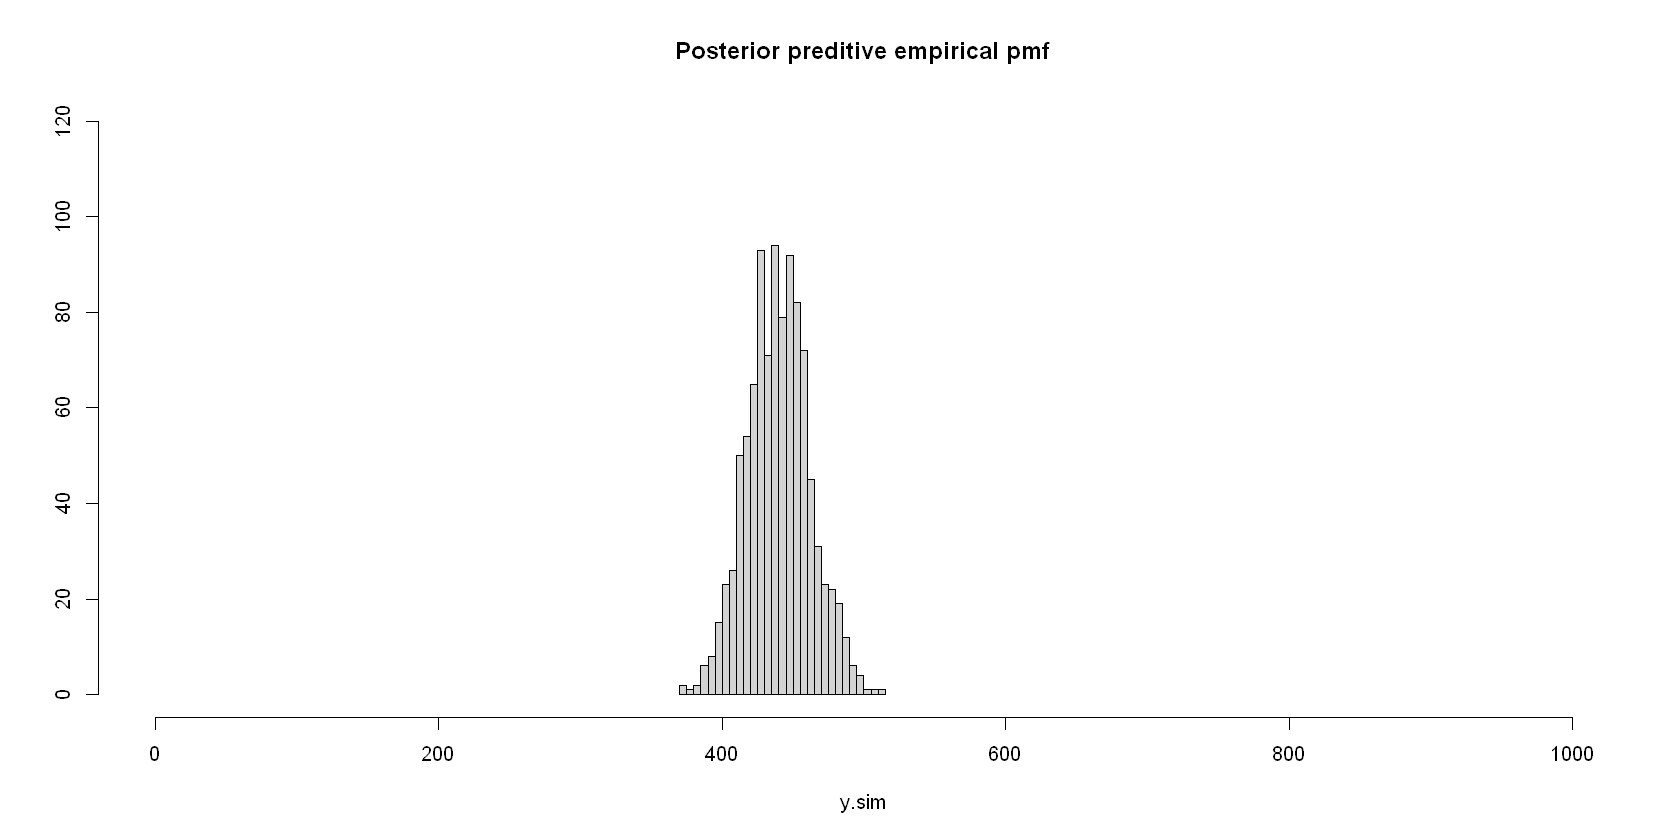

In [25]:
y.sim = rbinom(N, size = n, prob=pl.sim.thetas)
hist(y.sim, breaks=40, main="Posterior preditive empirical pmf", xlim=c(0, 1000), ylim=c(0,120),ylab="")

### Computing the median, mode, expectation and standard deviation of the posterior predictive pmf:

Similarly as before, for our calculations we will just take advantage of the functions provided by R, and we will calculate those statistics, using the values that we have found for the previous histogram.

[1] "Median: 440"
[1] "Mode: 436"
[1] "Expectation (Mean): 439.898"
[1] "Standard Deviation: 22.072852258075"


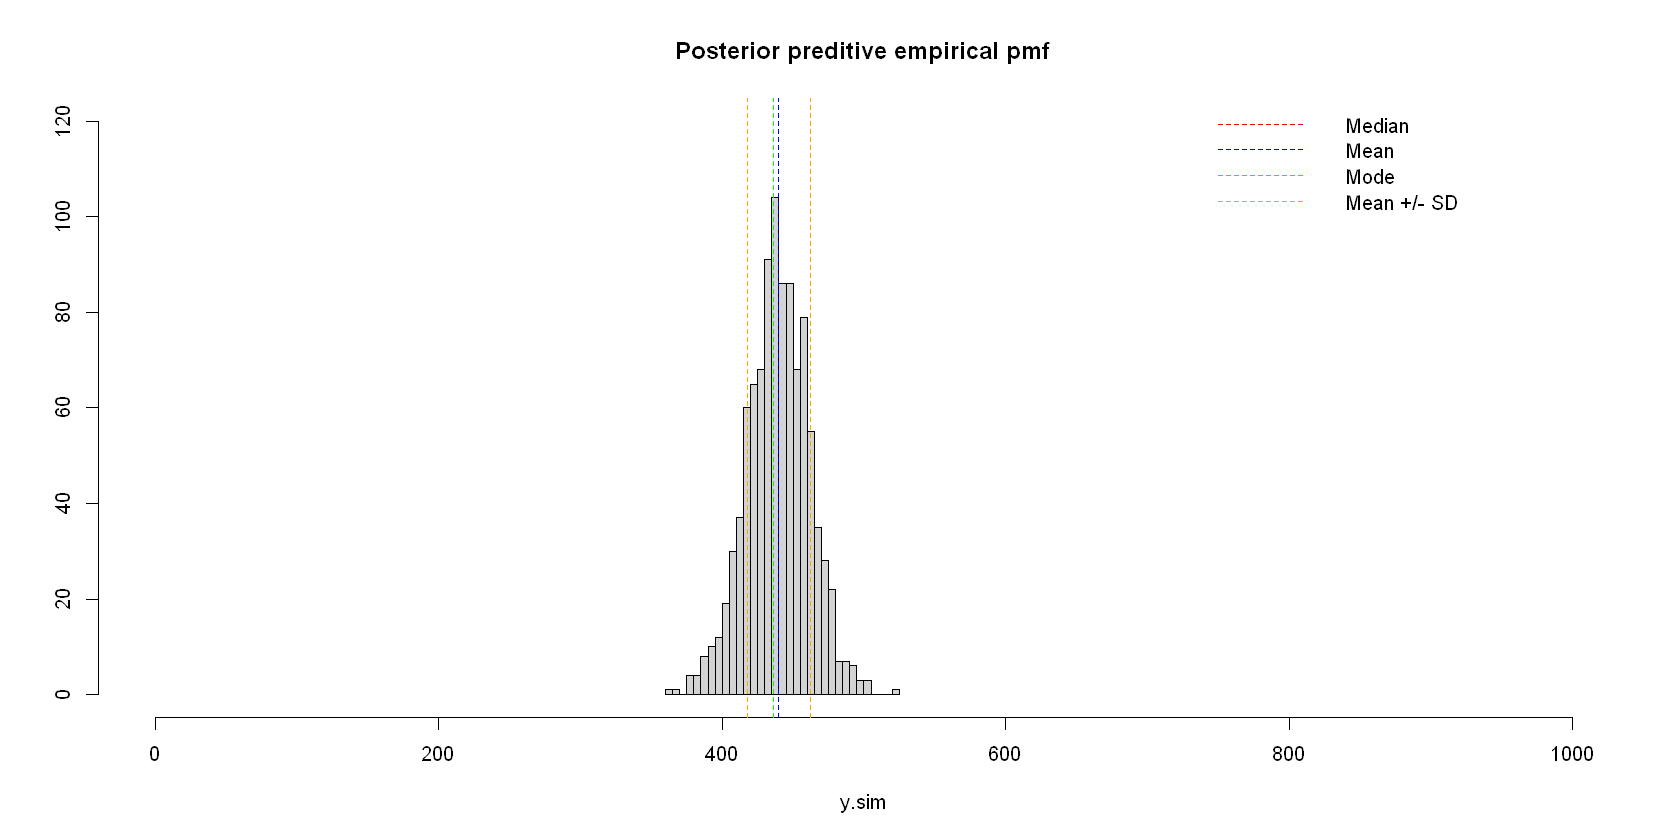

In [26]:
# With the piecewise prior

y.sim = rbinom(N, size = n, prob=pl.sim.thetas)
hist(y.sim, breaks=40, main="Posterior preditive empirical pmf", xlim=c(0, 1000), ylim=c(0,120),ylab="")

median_value <- median(y.sim)
mean_value <- mean(y.sim)
mode_value <- mode(y.sim)
sd_value <- sd(y.sim)

# Plot vertical lines for statistics
abline(v = median_value, col = "red", lty = 2)
abline(v = mean_value, col = "blue", lty = 2)
abline(v = mode_value, col = "green", lty = 2)
abline(v = mean_value - sd_value, col = "orange", lty = 2)
abline(v = mean_value + sd_value, col = "orange", lty = 2)

# Add legend
legend("topright", legend = c("Median", "Mean", "Mode", "Mean +/- SD"), col = c("red", "blue", "green", "orange"), lty = 2, bty = "n")

# Print results
print(paste("Median:", median_value))
print(paste("Mode:", mode_value))
print(paste("Expectation (Mean):", mean_value))
print(paste("Standard Deviation:", sd_value))

[1] "Median: 436.5"
[1] "Mode: 438"
[1] "Expectation (Mean): 437.167"
[1] "Standard Deviation: 21.7245268318108"


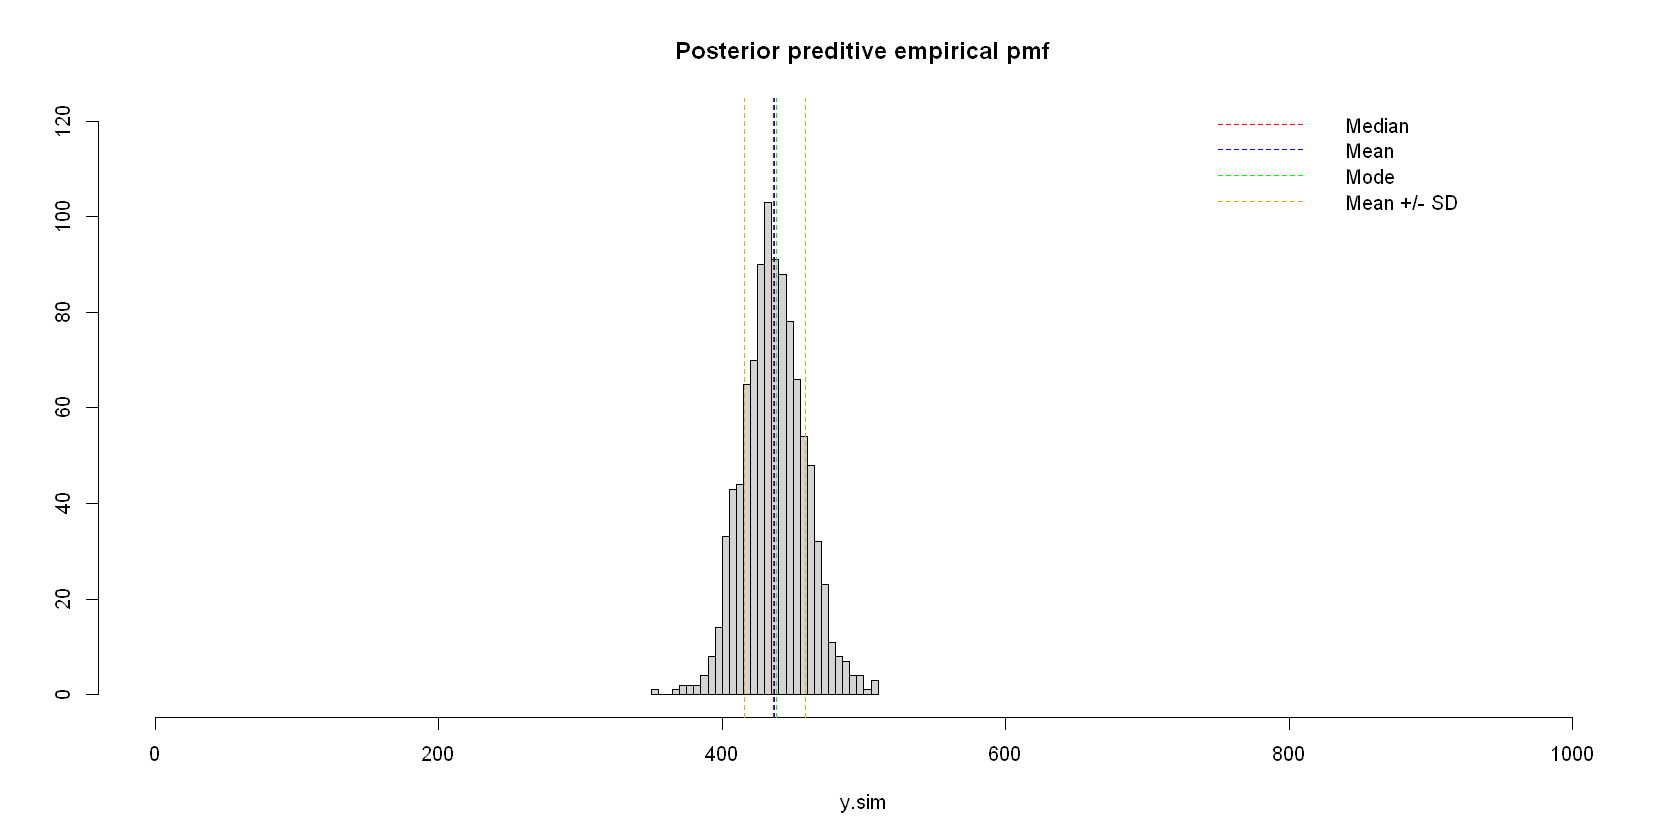

In [27]:
# With the beta prior

n = 980
y = 437
samples = rbeta(N,alpha0+y,beta0+n-y)

y.sim = rbinom(N, size = n, prob=samples)
hist(y.sim, breaks=40, main="Posterior preditive empirical pmf", xlim=c(0, 1000), ylim=c(0,120),ylab="")

median_value <- median(y.sim)
mean_value <- mean(y.sim)
mode_value <- mode(y.sim)
sd_value <- sd(y.sim)

# Plot vertical lines for statistics
abline(v = median_value, col = "red", lty = 2)
abline(v = mean_value, col = "blue", lty = 2)
abline(v = mode_value, col = "green", lty = 2)
abline(v = mean_value - sd_value, col = "orange", lty = 2)
abline(v = mean_value + sd_value, col = "orange", lty = 2)

# Add legend
legend("topright", legend = c("Median", "Mean", "Mode", "Mean +/- SD"), col = c("red", "blue", "green", "orange"), lty = 2, bty = "n")

# Print results
print(paste("Median:", median_value))
print(paste("Mode:", mode_value))
print(paste("Expectation (Mean):", mean_value))
print(paste("Standard Deviation:", sd_value))

### Comparing with the results from the prior $\textrm{Beta}(\alpha_0,\beta_0)$:

Finally, we decided to compare it with the results obtained with the $\textrm{Beta}(\alpha_0,\beta_0)$ prior and its posterior.

The values for the prior are already calculated. In section **1.2.3 Comparison with the resulst from the $\textrm{Beta}(\alpha_0,\beta_0)$ prior**. We compare them in the following table:

|  | Prior predictive $\textrm{Beta}(\alpha_0,\beta_0)$ | Posterior predictive $\textrm{Beta}(\alpha_0,\beta_0)$ | Posterior predictive piecewise linear |
| ---------------- | ---------------- | ---------------- | ---------------- |
| Median  | 482 | 437 | 441  |
| Mode  | 478  | 433 | 442 |
| Expectation (Mean)  | 482.650 | 437.596 | 441.242  |
| Standard Deviation  | 202.667861907113 | 21.5795843904016 | 21.4878841481698  |

Both posteriors are very similar. It makes sense that the mean is 441.242 knowing that this model is based in the observed data of 437 female births out of 980 placenta previa births (which is a 44.6% of them). The same happens with the median. We also observe that the standard deviation is much lower than compared to the prior.

## Exercise 2: Asthma mortality

This exercise pertains to `Poisson.01.pub.ipynb` (lecture 7). Review this notebook as well as the notes concerning the Poisson model and do the following:

 1. Generate a sample from the prior predictive distribution.

 2. Generate a sample from the posterior predictive distribution after the first experiment (with $y=3$ after one year in a population of 200,000).

In both cases plot the simulated pmf and compare it with the theoretical one and estimate the probability of having more than 25 fatalities in the next 10 years (assuming all other conditions remain constant).

## Answer 2.1

### Prior Predictive

To get the prior predictive distribution, we first look at the **prior distribution**.

We define our parameter as follows:
- $\theta$: variable that represents the average rate of the number of deaths caused by asthma in a population of 100,000 people in one year.

As seen in the Notebook `Poisson.01.pub.ipynb` from lecture 7, research suggest that the average of deaths caused by asthma in Western countries is around 0.6 per 100,000 people every year. Using this information to find the prior distribution, we need to find parameters $\alpha$ and $\beta$ such that $\frac{\alpha}{\beta} = 0.6$ (that is because the expectiation of this distribution is given by this ratio, and we want it to be the value $0.6$). With that we will have that the prior distribution is a distribution $\textrm{Gamma}(\alpha, \beta)$.

Now, if we test for different values of $\alpha$ and $\beta$ we can study the corresponding distribution and choose which one fits our problem better.
In our case, we know that the value $1.5$ needs to be a high quantile of the distribution. In the next cell, we test for different values applying this condition and we use the cumulative probability to test the condition.


In [28]:
# We are looking for alpha and beta such that Gamma.expectation = alpha/beta = 0.6 and with 1.5 is high quantile of this distribution

# For instance 1:
alpha<-12
beta<-20
# Check the cumulative probility of 1.5 with those parameters
d<-round(100*pgamma(1.5,shape=alpha,rate=beta),4)
print(paste("Cumulative distribution for 1.5 with alpha=12 and beta=20:", d))

# For instance 2:
alpha<-6
beta<-10
# Check the cumulative probility of 1.5 with those parameters
d<-round(100*pgamma(1.5,shape=alpha,rate=beta),4)
print(paste("Cumulative distribution for 1.5 with alpha=6 and beta=10:", d))

# For instance 3:
alpha<-3
beta<-5
# Check the cumulative probility of 1.5 with those parameters
d<-round(100*pgamma(1.5,shape=alpha,rate=beta),4)
print(paste("Cumulative distribution for 1.5 with alpha=3 and beta=5:", d))

# For instance 4:
alpha<-1.5
beta<-2.5
# Check the cumulative probility of 1.5 with those parameters
d<-round(100*pgamma(1.5,shape=alpha,rate=beta),4)
print(paste("Cumulative distribution for 1.5 with alpha=1.5 and beta=2.5:", d))

[1] "Cumulative distribution for 1.5 with alpha=12 and beta=20: 99.9936"
[1] "Cumulative distribution for 1.5 with alpha=6 and beta=10: 99.7208"
[1] "Cumulative distribution for 1.5 with alpha=3 and beta=5: 97.9743"
[1] "Cumulative distribution for 1.5 with alpha=1.5 and beta=2.5: 94.2442"


In the above test, we can see that the first two values are too high, the probability of $1.5$ can be a bit lower even being a high quantile of the distribution. The last values is a bit too low. Then, we choose $\alpha = 3$ and $\beta=5$ and we have that our **prior distribution** is $\textrm{Gamma}(3, 5)$.

Now that we have the prior distribution for $\theta$, we can look at the **prior predictive** distribution.

Our problem defined as the number of deaths caused by asthma in a population of 100,000 people in one year can be best modeled with a **Poisson distribution**. This distribution expresses the probability of a given number of events occurring in a fixed interval of time, if these events occur with a known constant mean rate and independently of the time since the last event [1]. We can assume those conditions are true in our case. This means that **the Poisson distribution is likelihood distribution in our problem**.

Using the variable $z$ to denote the number of observed deaths caused by asthma in a population of 100,000 people in one year, we have that
$$z \mid\theta \sim p(z \mid\theta) \sim \textrm{Poisson}(\theta)$$

Now we have all the pieces that we need to find the prior predictive distribution. Let $p(z)$ be the prior predictive distribution, then
$$p(z)=\int_{0}^{\infty} p(z,\theta) \, d\theta = \int_{0}^{\infty} p(z \mid\theta) p(\theta) \, d\theta$$
with
- $p(z \mid θ)$, the likelihoood function, that we know is a $\textrm{Poisson}(\theta)$ distribution
- $p(θ)$, the prior distribution, that we know is a $\textrm{Gamma}(3, 5)$.

r.
[1] *[Poisson distribution - Wikipedia](https://en.wikipedia.org/wiki/Poisson_distribution)*

Let's calculate the previous integral. We will use the following formulas
1. $$p(z \mid\theta) \sim \textrm{Poisson}(\theta) = \frac{\theta^z e^{-\theta}}{z!}$$
2. $$p(\theta) \sim \textrm{Gamma}(\alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)}\theta^{\alpha-1}e^{-\beta\theta}$$ where $\Gamma(\alpha) = (\alpha - 1)!$ for $\alpha$ a positive integer.

Substituting these formulas in the previous integral we have that
$$p(z)=\int_{0}^{\infty} p(z,\theta) \, d\theta = \int_{0}^{\infty} p(z \mid\theta) p(\theta) \, d\theta = \int_{0}^{\infty} \frac{\theta^z e^{-\theta}}{z!} \frac{\beta^\alpha}{\Gamma(\alpha)}\theta^{\alpha-1}e^{-\beta\theta} \, d\theta = \frac{\beta^\alpha}{z! \Gamma(\alpha)}\int_{0}^{\infty}\theta^z e^{-\theta}\theta^{\alpha-1}e^{-\beta\theta} \, d\theta = \frac{\beta^\alpha}{z! \Gamma(\alpha)}\int_{0}^{\infty}\theta^{z+\alpha-1} e^{-(\beta+1)\theta} \, d\theta $$

Note that we have just taking out of the integral the terms that do not depend on $\theta$ and we have grouped the terms inside of the integral. Also, note that, what is left inside the integral is really simmilar to a $\textrm{Gamma}(z+\alpha, \beta+1)$ distribution (only missing the terms that do not depend on $\theta$), we can take advantage of this to calculate the integral. In the next step, we introduce the necessary terms to complete the integral to a $\textrm{Gamma}(z+\alpha, \beta+1)$ distribution, and its reciprocal. Then, the resulting integral simply equals $1$ since we are integrating the distribution over its entire support $(0,\infty)$. The result is the following:
$$p(z)= \frac{\beta^\alpha}{z! \Gamma(\alpha)}\int_{0}^{\infty}\theta^{z+\alpha-1} e^{-(\beta+1)\theta} \, d\theta = \frac{\beta^\alpha}{z! \Gamma(\alpha)} \frac{\Gamma(z+\alpha)}{(\beta+1)^{z+\alpha}}\int_{0}^{\infty} \frac{(\beta+1)^{z+\alpha}}{\Gamma(z+\alpha)}\theta^{z+\alpha-1} e^{-(\beta+1)\theta} \, d\theta = \frac{\beta^\alpha}{z! \Gamma(\alpha)} \frac{\Gamma(z+\alpha)}{(\beta+1)^{z+\alpha}}$$

Now, rewriting the terms and using that $\Gamma(\alpha) = (\alpha - 1)!$ for $\alpha$ a positive integer, we have
$$p(z) = \frac{\beta^\alpha}{(\beta+1)^{z+\alpha}} \frac{\Gamma(z+\alpha)}{z! \Gamma(\alpha)} = \left(\frac{\beta}{\beta+1}\right)^{\alpha}\left(\frac{1}{\beta+1}\right)^{z}\frac{(z+\alpha-1)!}{z! (\alpha-1)!} = \binom{z+\alpha-1}{z}\left(\frac{1}{\beta+1}\right)^{z}\left(\frac{\beta}{\beta+1}\right)^{\alpha} \sim \textrm{NB}(\alpha, \beta)$$

In the last step we find that our **prior predictive** distribution is a **Negative Binomial distribution** with parameters $\alpha$ and $\beta$ using the following facts:
1. $$\frac{(z+\alpha-1)!}{z! (\alpha-1)!} = \binom{z+\alpha-1}{z} \text{ is the binomal coefficient}$$
2. $$\textrm{NB}(r, p) = \binom{k+r-1}{k}(1-p)^{k}p^{r} \text{ , in our case we use } p=\frac{\beta}{\beta+1} \text{ , } k=z \text{ and } r=\alpha$$

To sum up, we have the following:
- $\theta$: variable that represents the average rate of the number of deaths caused by asthma in a population of 100,000 people in one year.
- $z$: variable that represents the number of deaths caused by asthma in a population of 100,000 people in one year.
- The prior distribution of $\theta$ is $p(\theta)\sim \textrm{Gamma}(3, 5)$.
- The likelihood distribution of $z\mid\theta$ is $p(z \mid \theta)\sim \textrm{Poisson}(\theta)$.
- The prior predictive distribution of $z$ is $p(z) \sim \textrm{NB}(3, \frac{5}{6})$.

Finally, let's generate a sample of size 10000 from the prior predictive distribution and visualize it with a histogram. Using the Negative Binomial distribution, we are sampling from the theoretical distribution. Sampling first from the $\textrm{Gamma}(3, 5)$ distribution and then using the parameter $\theta^{*}$ that we obtain to sample from a $\textrm{Poisson}(\theta^{*})$ we will obtain the empirical sample. **Using these samples, we plot the theoretical and the simulated pmf.**

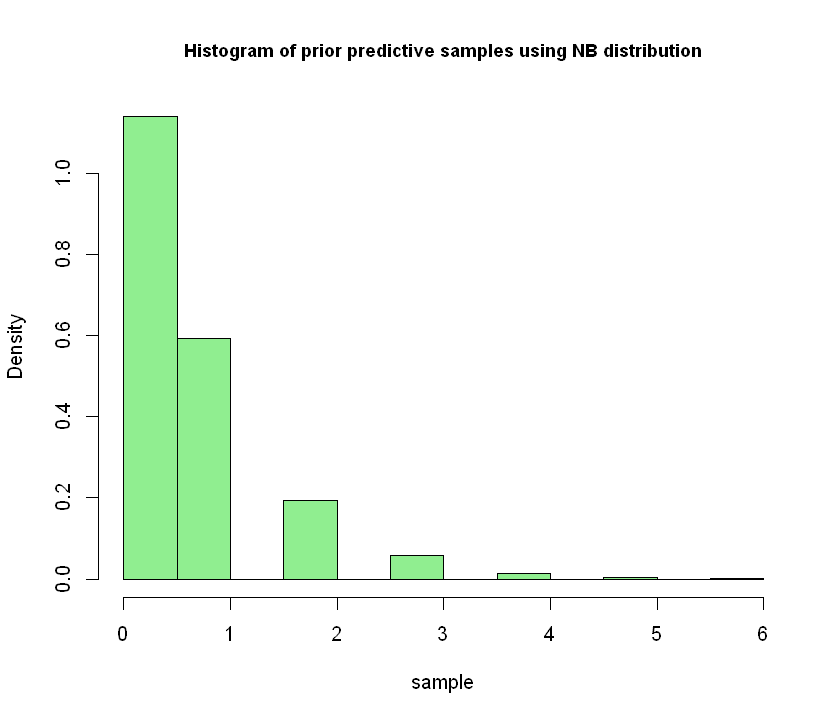

In [29]:
alpha<-3.0
beta<-5.0
p<- beta/(beta+1)

# Theoretical sample

N<-10000 #size of the sample

# Sample from Negative Binomial distribution
sample<-rnbinom(N, size = alpha, prob = p)

options(repr.plot.width=7,repr.plot.height=6)
hist(sample,col="LightGreen",freq=FALSE,
     main="Histogram of prior predictive samples using NB distribution",cex.main=0.9)

[1] 0.6315434


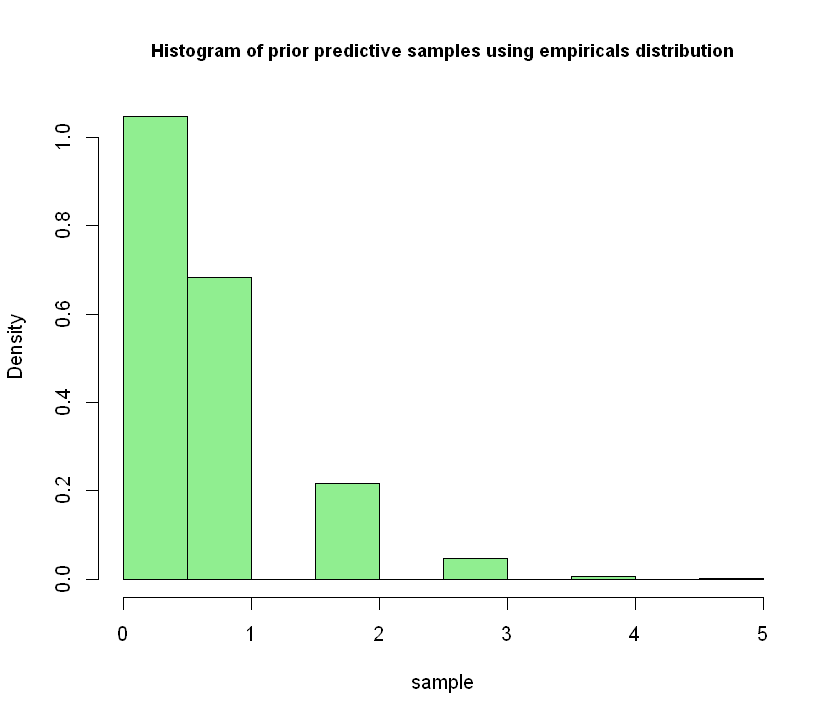

In [30]:
# Empirical sample

# One sample from the gamma distribution
theta <- rgamma(1, shape = alpha, rate = beta)
print(theta)

# Sampling from Poisson
N<-10000 #size of the sample
sample <- rpois(N, theta)

options(repr.plot.width=7,repr.plot.height=6)
hist(sample,col="LightGreen",freq=FALSE,
     main="Histogram of prior predictive samples using empiricals distribution",cex.main=0.9)

Next we calculate **the probability of having more than 25 deaths in the next 10 years** (assuming the other variables remain constant).

Now, we have to change our variable **$z$ to represent the number of deaths caused by asthma in a population of 100,000 people during 10 years.**
As we have seen in class, in this case we will have more than one data point, so we need to use the distribution $\textrm{Poisson}(n\cdot\theta)$ with $n=10$ as the likelihood function.

Being the prior distribution a $\textrm{Gamma}(\alpha, \beta)$, with the new likelihood, the prior predictive distribution will be $\textrm{NB}(\alpha, \frac{\beta}{\beta+n})$. The formula is derivated in the same way as we have derivated the first one. With this information we compute the theoretical probability.



In [31]:
alpha<-3.0
beta<-5.0
n <- 10
p<- beta/(beta+n)

# Calculate the probability of X being greater than 25 in ten year with the theoretical distribution
prob1 <- 1- pnbinom(25, size = alpha, prob = p)
print(prob1*100)

[1] 0.1284869


We can see that **the probability of having more than 25 deaths in the next 10 years is quite low, of 0.13%**, this makes sense since the mortality rate is also low.

## Answer 2.2

### 2. Posterior Predictive

Now, we observe the first experiment and obtain that the number of deaths caused by asthma is $y=3$ after one year in a population of 200,000.

Given that now we have the variable $y$ that represents the number of deaths caused by asthma in a population of 200,000 in one year, we need to change the likelihood function again and introduce the **exposure parameter** $x=2$ since we are doubling the size of the population that we were considering before.

With this, the **new likelihood function is $\textrm{Poisson}(2\cdot\theta)$.**

As well as before, to compute the posterior predictive distribution, we need the **posterior distribution of $\theta$.** As given in the example notebook, we have that if the prior distribution is $\theta \sim \textrm{Gamma}(\alpha, \beta)$, then the posterior distribution is $\theta \sim \textrm{Gamma}(\alpha +y, \beta+x)$, where $y$ is the new observation and $x$ is the exposure parameter.

In our case, the **posterior distribution of $\theta$ becomes a $\textrm{Gamma}(6, 7)$**.

Now, using the same formula as before we can compute the **posterior predictive** distribtion for $y$. We have,
$$p(y)=\int_{0}^{\infty} p(y,\theta) \, d\theta = \int_{0}^{\infty} p(y \mid\theta) p(\theta) \, d\theta$$
with
- $p(y \mid\theta) \sim \textrm{Poisson}(2\theta)$
- $p(\theta) \sim \textrm{Gamma}(6,7)$

Again, the derivation of the formula is the same as before, and we obtain the the **posterior predictive** distribution is $\textrm{NB}(\alpha, \frac{\beta}{\beta+x}) = \textrm{NB}(6, \frac{7}{9})$ in our case.

Let us sample both theoretical and simulated distributions now, as we have done before.

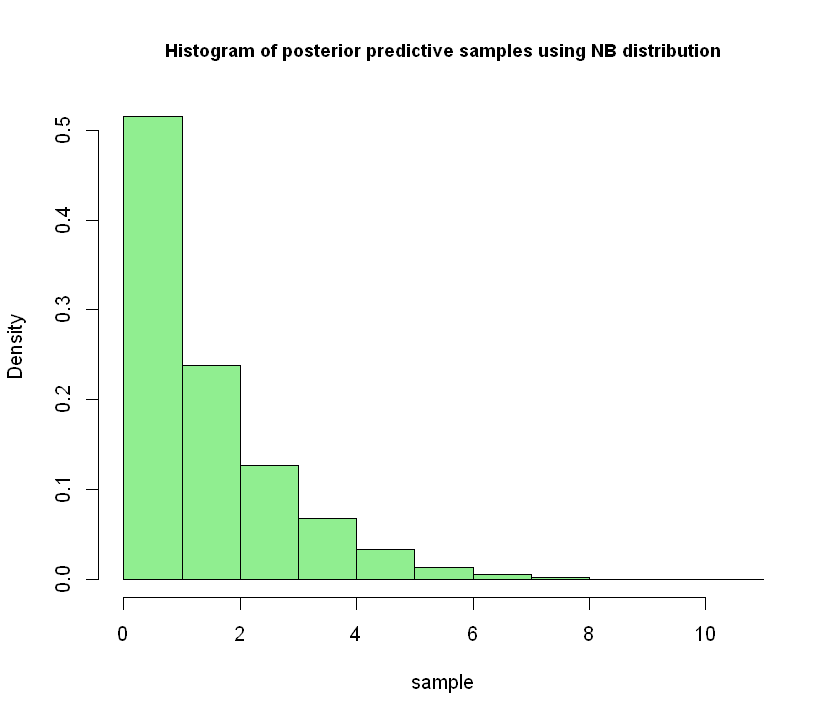

In [32]:
alpha<-6.0
beta<-7.0
x<-2
p<- beta/(beta+x)

# Theoretical sample

N<-10000 #size of the sample

# Sample from Negative Binomial distribution
sample<-rnbinom(N, size = alpha, prob = p)

options(repr.plot.width=7,repr.plot.height=6)
hist(sample,col="LightGreen",freq=FALSE,
     main="Histogram of posterior predictive samples using NB distribution",cex.main=0.9)

[1] 0.5442645


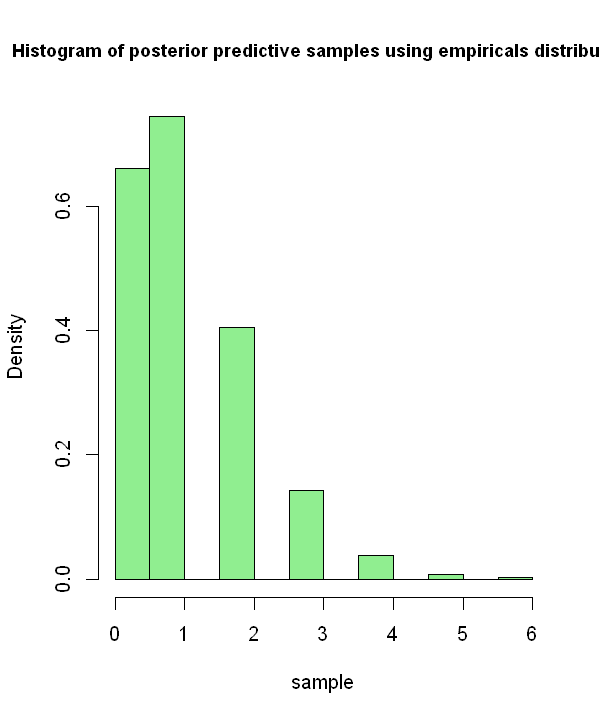

In [33]:
# Empirical sample

# One sample from the gamma distribution
theta <- rgamma(1, shape = alpha, rate = beta)
print(theta)

# Sampling from Poisson
N<-10000 #size of the sample
sample <- rpois(N, x*theta)

options(repr.plot.width=5,repr.plot.height=6)
hist(sample,col="LightGreen",freq=FALSE,
     main="Histogram of posterior predictive samples using empiricals distribution",cex.main=0.9)

To compute the probability of having more than 25 deaths in the next 10 years, we repeat the same process.

We have to change our variable **$y$ to represent the number of deaths caused by asthma in a population of 200,000 people during 10 years.**
As we have seen in class, in this case we will have more than one data point, so we need to use the distribution $\textrm{Poisson}(n\cdot\theta)$ with $n=10$ as the likelihood function.

Being the posterior distribution a $\textrm{Gamma}(\alpha+y, \beta+x)=\textrm{Gamma}(6,7)$, with the new likelihood, the prior predictive distribution will be $\textrm{NB}(6, \frac{7}{7+n})$ (here we prefered to use the numerical values to avoid overcomplicating the notation for the parameters). The formula is derivated in the same way as we have derivated the first one. With this information we will compute the probability, both with the theoretical function and with the empirical derivation.


In [34]:
alpha<-6.0
beta<-7.0
n <- 10
p<- beta/(beta+n)

# Calculate the probability of X being greater than 25 in ten year with the theoretical distribution
prob1 <- 1- pnbinom(25, size = alpha, prob = p)
print(prob1)
print(prob1*100)

[1] 0.002721252
[1] 0.2721252


In this case, **the probability of having more than 25 deaths in the next 10 years is the 0.27%**. Still is quite low, but it makes sense that is higher than before sice we are dealing with a population that has higher mortality rates.